In [1]:
# !pip install SPARQLWrapper
import json, requests, xml
from xml.dom import minidom
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
from rdflib import Graph as RDFGraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
import networkx as nx
from networkx import Graph as NXGraph
import matplotlib.pyplot as plt
import rdflib
import urllib
from matplotlib.pyplot import figure


c:\Users\yvesc\AppData\Local\Programs\Python\Python38\lib\site-packages\rdflib_jsonld\__init__.py:9: DeprecationWarning: The rdflib-jsonld package has been integrated into rdflib as of rdflib==6.0.1.  Please remove rdflib-jsonld from your project's dependencies.
  warnings.warn(


In [2]:
def load_dataframe( query_response ):
  processed_results = json.load(query_response)
  cols = processed_results['head']['vars']
  out = []
  for row in processed_results['results']['bindings']:
     item = []
     for c in cols:
         item.append(row.get(c, {}).get('value'))
     out.append(item)
  df = pd.DataFrame(out, columns=cols)
  return df


# FedEO API Tutorial - PART 4: SPARQL  
 This tutorial is part of a series of tutorials covering related subjects:                  

 * [FedEO API Tutorial - PART 1: OpenSearch and API Features](tutorial-1-api.ipynb)
 * [FedEO API Tutorial - PART 2: STAC](tutorial-2-stac.ipynb)
 * [FedEO API Tutorial - PART 3: SPARQL Online](tutorial-3-sparql-online.ipynb)
 * FedEO API Tutorial - PART 4: SPARQL Offline


<a name='Overview'></a>     
## Overview  
 The different topics covered in this Notebook are:    
 * SPARQL SELECT - See also https://www.w3.org/TR/rdf-sparql-query/#select
    * [SPARQL SELECT - Find science keywords](#SPARQL-SELECT---Find-science-keywords) 
    * [SPARQL SELECT - Find tool categories](#SPARQL-SELECT---Find-tool-categories) 
    * [SPARQL SELECT - Find Platforms and Instruments](#SPARQL-SELECT---Find-Platforms-and-Instruments)
    * [SPARQL SELECT - Find Granules](#SPARQL-SELECT---Find-Granules)
    * [SPARQL SELECT - Find Collections](#SPARQL-SELECT---Find-Collections)
    * [SPARQL SELECT - Find Services](#SPARQL-SELECT---Find-Services)
 * SPARQL DESCRIBE - See also https://www.w3.org/TR/rdf-sparql-query/#describe
    * [SPARQL DESCRIBE - Describe Granules](#SPARQL-DESCRIBE---Granules)    
    * [SPARQL DESCRIBE - Describe Collections](#SPARQL-DESCRIBE---Collections)   
    * [SPARQL DESCRIBE - Describe Services](#SPARQL-DESCRIBE---Services)


<a name='SPARQL-SELECT---Find-science-keywords'></a>     
## SPARQL SELECT - Find science keywords  
**Example: 2**  
>  Science keywords with GEMET or INSPIRE mapping   
> Requirement:  EOVOC-RSTR-FC-026030  
 OK  


In [3]:
q="""

PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>

SELECT ?topic ?name ?entity
WHERE
{
  ?topic skos:inScheme <https://earth.esa.int/concepts/concept_scheme/earth-topics>.
  ?topic skos:prefLabel ?name.
  ?topic  ?p ?entity.
     FILTER(regex(str(?entity), "europa", "i")).
}
LIMIT 20

"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


topic  \
0   https://earth.esa.int/concept/land-use-land-cover   
1   https://earth.esa.int/concept/land-use-land-cover   
2             https://earth.esa.int/concept/landscape   
3   https://earth.esa.int/concept/mapping-cartography   
4                 https://earth.esa.int/concept/soils   
5                 https://earth.esa.int/concept/soils   
6   https://earth.esa.int/concept/erosion-sediment...   
7   https://earth.esa.int/concept/geomorphic-landf...   
8   https://earth.esa.int/concept/environmental-go...   
9        https://earth.esa.int/concept/infrastructure   
10  https://earth.esa.int/concept/energy-natural-r...   
11    https://earth.esa.int/concept/human-settlements   
12             https://earth.esa.int/concept/security   
13  https://earth.esa.int/concept/natural-hazards-...   
14        https://earth.esa.int/concept/public-health   
15        https://earth.esa.int/concept/public-health   
16           https://earth.esa.int/concept/population   
17           https://earth.esa.int/concept/population   
18             https://earth.esa.int/concept/wetlands   
19        https://earth.esa.int/concept/surface-water   

                                       name  \
0                   Land Use and Land Cover   
1                   Land Use and Land Cover   
2                                 Landscape   
3                   Mapping and Cartography   
4                                     Soils   
5                                     Soils   
6                 Erosion and Sedimentation   
7        Geomorphic Landforms and Processes   
8   Environmental Governance and Management   
9                            Infrastructure   
10             Energy and Natural Resources   
11                        Human Settlements   
12                                 Security   
13        Natural Hazards and Disaster Risk   
14                            Public Health   
15                            Public Health   
16                               Population   
17                               Population   
18                                 Wetlands   
19                            Surface Water   

                                               entity  
0   https://www.eionet.europa.eu/gemet/en/inspire-...  
1   https://www.eionet.europa.eu/gemet/en/inspire-...  
2   https://www.eionet.europa.eu/gemet/en/concept/...  
3   https://www.eionet.europa.eu/gemet/en/concept/...  
4   https://www.eionet.europa.eu/gemet/en/concept/...  
5   https://www.eionet.europa.eu/gemet/en/inspire-...  
6   https://www.eionet.europa.eu/gemet/en/concept/...  
7   https://www.eionet.europa.eu/gemet/en/concept/...  
8   https://www.eionet.europa.eu/gemet/en/concept/...  
9   https://www.eionet.europa.eu/gemet/en/concept/...  
10  https://www.eionet.europa.eu/gemet/en/inspire-...  
11  https://www.eionet.europa.eu/gemet/en/concept/...  
12  https://www.eionet.europa.eu/gemet/en/concept/...  
13  https://www.eionet.europa.eu/gemet/en/concept/...  
14  https://www.eionet.europa.eu/gemet/en/concept/...  
15  https://www.eionet.europa.eu/gemet/en/inspire-...  
16  https://www.eionet.europa.eu/gemet/en/concept/...  
17  https://www.eionet.europa.eu/gemet/en/inspire-...  
18  https://www.eionet.europa.eu/gemet/en/concept/...  
19  https://www.eionet.europa.eu/gemet/en/concept/...

<a name='SPARQL-SELECT---Find-tool-categories'></a>     
## SPARQL SELECT - Find tool categories  
**Example: 3**  
>  Tool categories with GCMD mapping   
> Requirement:  EOVOC-RSTR-FC-026040  
 OK  


In [4]:
q="""

PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX esa: <http://earth.esa.int/>
PREFIX esascheme: <https://earth.esa.int/concepts/concept_scheme/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sosa: <http://www.w3.org/ns/sosa/>

SELECT DISTINCT ?category ?name ?entity ?p
WHERE
{
  ?category skos:inScheme <https://earth.esa.int/concepts/concept_scheme/tools>.
  ?category skos:prefLabel ?name.
  ?category ?p ?entity.
     FILTER(regex(str(?entity), "gcmd", "i")).
}
LIMIT 20

"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


category           name  \
0       https://earth.esa.int/concept/analysis       Analysis   
1       https://earth.esa.int/concept/analysis       Analysis   
2     https://earth.esa.int/concept/processing     Processing   
3     https://earth.esa.int/concept/processing     Processing   
4  https://earth.esa.int/concept/visualisation  Visualisation   
5  https://earth.esa.int/concept/visualisation  Visualisation   

                                              entity  \
0  https://gcmd.earthdata.nasa.gov/kms/concept/51...   
1  https://gcmd.earthdata.nasa.gov/kms/concept/51...   
2  https://gcmd.earthdata.nasa.gov/kms/concept/46...   
3  https://gcmd.earthdata.nasa.gov/kms/concept/46...   
4  https://gcmd.earthdata.nasa.gov/kms/concept/f4...   
5  https://gcmd.earthdata.nasa.gov/kms/concept/f4...   

                                                p  
0  http://www.w3.org/2004/02/skos/core#closeMatch  
1  http://www.w3.org/2004/02/skos/core#closeMatch  
2  http://www.w3.org/2004/02/skos/core#closeMatch  
3  http://www.w3.org/2004/02/skos/core#closeMatch  
4  http://www.w3.org/2004/02/skos/core#closeMatch  
5  http://www.w3.org/2004/02/skos/core#closeMatch

**Example: 4**  
>  Count Tool categories with GCMD mapping   
> Requirement:  EOVOC-RSTR-FC-026040  
 OK  


In [5]:
q="""

PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>


SELECT (COUNT(?category) as ?count)
WHERE
{
  ?category skos:inScheme <https://earth.esa.int/concepts/concept_scheme/tools>.
  ?category ?p ?entity.
     FILTER(regex(str(?entity), "gcmd", "i")).
}

"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


count
0     3

<a name='SPARQL-SELECT---Find-Platforms-and-Instruments'></a>     
## SPARQL SELECT - Find Platforms and Instruments  
**Example: 5**  
>  Platforms with Wikidata mapping   
> Requirement:  EOVOC-RSTR-FC-026010 (2)  
  OK  


In [6]:
q="""

PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX esa: <http://earth.esa.int/>
PREFIX esascheme: <https://earth.esa.int/concepts/concept_scheme/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sosa: <http://www.w3.org/ns/sosa/>

SELECT ?platform ?name ?entity
WHERE
{
  ?platform skos:inScheme <https://earth.esa.int/concepts/concept_scheme/platforms>.
  ?platform skos:prefLabel ?name.
  ?platform  owl:sameAs ?entity.
     FILTER(regex(str(?entity), "wikidata", "i")).
}
LIMIT 20

"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


platform        name  \
0     https://earth.esa.int/concept/envisat     Envisat   
1       https://earth.esa.int/concept/proba       PROBA   
2  https://earth.esa.int/concept/terrasar-x  TerraSAR-X   
3   https://earth.esa.int/concept/landsat-5   Landsat-5   
4     https://earth.esa.int/concept/proba-1     PROBA-1   
5     https://earth.esa.int/concept/proba-v     PROBA-V   

                                    entity  
0    http://www.wikidata.org/entity/Q49692  
1  http://www.wikidata.org/entity/Q3888188  
2   http://www.wikidata.org/entity/Q705882  
3  http://www.wikidata.org/entity/Q3502357  
4  http://www.wikidata.org/entity/Q1479854  
5  http://www.wikidata.org/entity/Q3359841

**Example: 6**  
>  Platforms with DBpedia mapping   
> Requirement:  EOVOC-RSTR-FC-026010 (1)  
  OK  


In [7]:
q="""

PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX esa: <http://earth.esa.int/>
PREFIX esascheme: <https://earth.esa.int/concepts/concept_scheme/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sosa: <http://www.w3.org/ns/sosa/>

SELECT ?platform ?name ?entity
WHERE
{
  ?platform skos:inScheme <https://earth.esa.int/concepts/concept_scheme/platforms>.
  ?platform skos:prefLabel ?name.
  ?platform  owl:sameAs ?entity.
     FILTER(regex(str(?entity), "dbpedia", "i")).
}
LIMIT 20

"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


platform  \
0   https://earth.esa.int/concept/earth-observatio...   
1                https://earth.esa.int/concept/aeolus   
2                  https://earth.esa.int/concept/aura   
3              https://earth.esa.int/concept/cassiope   
4                 https://earth.esa.int/concept/champ   
5              https://earth.esa.int/concept/coriolis   
6          https://earth.esa.int/concept/cosmo-skymed   
7                  https://earth.esa.int/concept/dmsp   
8             https://earth.esa.int/concept/earthcare   
9               https://earth.esa.int/concept/envisat   
10                 https://earth.esa.int/concept/flex   
11                https://earth.esa.int/concept/terra   
12                 https://earth.esa.int/concept/aqua   
13                  https://earth.esa.int/concept/ers   
14             https://earth.esa.int/concept/formosat   
15                 https://earth.esa.int/concept/gcom   
16                 https://earth.esa.int/concept/goce   
17                 https://earth.esa.int/concept/jpss   
18              https://earth.esa.int/concept/kompsat   
19              https://earth.esa.int/concept/landsat   

                                name  \
0        Earth Observation Satellite   
1                             Aeolus   
2                               Aura   
3                           CASSIOPE   
4                              CHAMP   
5                           CORIOLIS   
6                       COSMO-SkyMed   
7   Defense Meteorological Satellite   
8                          EarthCARE   
9                            Envisat   
10                              FLEX   
11                             TERRA   
12                              AQUA   
13                               ERS   
14                          FORMOSAT   
15                              GCOM   
16                              GOCE   
17      Joint Polar Satellite System   
18                           KOMPSAT   
19                           Landsat   

                                               entity  
0   http://dbpedia.org/resource/Earth_observation_...  
1              http://dbpedia.org/resource/ADM-Aeolus  
2        http://dbpedia.org/resource/Aura_(satellite)  
3                http://dbpedia.org/resource/CASSIOPE  
4       http://dbpedia.org/resource/CHAMP_(satellite)  
5    http://dbpedia.org/resource/Coriolis_(satellite)  
6            http://dbpedia.org/resource/COSMO-SkyMed  
7   http://dbpedia.org/resource/Defense_Meteorolog...  
8               http://dbpedia.org/resource/EarthCARE  
9                 http://dbpedia.org/resource/Envisat  
10       http://dbpedia.org/resource/FLEX_(satellite)  
11      http://dbpedia.org/resource/Terra_(satellite)  
12       http://dbpedia.org/resource/Aqua_(satellite)  
13  http://dbpedia.org/resource/European_Remote-Se...  
14             http://dbpedia.org/resource/Formosat-2  
15  http://dbpedia.org/resource/Global_Change_Obse...  
16  http://dbpedia.org/resource/Gravity_Field_and_...  
17  http://dbpedia.org/resource/Joint_Polar_Satell...  
18                http://dbpedia.org/resource/KOMPSAT  
19        http://dbpedia.org/resource/Landsat_program

**Example: 7**  
>  Platforms with Yago mapping    
> Requirement:  EOVOC-RSTR-FC-026010 (3)  
  OK  


In [8]:
q="""

PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX esa: <http://earth.esa.int/>
PREFIX esascheme: <https://earth.esa.int/concepts/concept_scheme/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sosa: <http://www.w3.org/ns/sosa/>

SELECT ?platform ?name ?entity
WHERE
{
  ?platform skos:inScheme <https://earth.esa.int/concepts/concept_scheme/platforms>.
  ?platform skos:prefLabel ?name.
  ?platform  owl:sameAs ?entity.
     FILTER(regex(str(?entity), "yago-knowledge", "i")).
}
LIMIT 20

"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


platform  \
0   https://earth.esa.int/concept/earth-observatio...   
1                https://earth.esa.int/concept/aeolus   
2                  https://earth.esa.int/concept/aura   
3              https://earth.esa.int/concept/cassiope   
4                 https://earth.esa.int/concept/champ   
5              https://earth.esa.int/concept/coriolis   
6          https://earth.esa.int/concept/cosmo-skymed   
7                  https://earth.esa.int/concept/dmsp   
8             https://earth.esa.int/concept/earthcare   
9               https://earth.esa.int/concept/envisat   
10                 https://earth.esa.int/concept/flex   
11                https://earth.esa.int/concept/terra   
12                 https://earth.esa.int/concept/aqua   
13                  https://earth.esa.int/concept/ers   
14             https://earth.esa.int/concept/formosat   
15                 https://earth.esa.int/concept/gcom   
16                 https://earth.esa.int/concept/goce   
17                 https://earth.esa.int/concept/jpss   
18              https://earth.esa.int/concept/kompsat   
19              https://earth.esa.int/concept/landsat   

                                name  \
0        Earth Observation Satellite   
1                             Aeolus   
2                               Aura   
3                           CASSIOPE   
4                              CHAMP   
5                           CORIOLIS   
6                       COSMO-SkyMed   
7   Defense Meteorological Satellite   
8                          EarthCARE   
9                            Envisat   
10                              FLEX   
11                             TERRA   
12                              AQUA   
13                               ERS   
14                          FORMOSAT   
15                              GCOM   
16                              GOCE   
17      Joint Polar Satellite System   
18                           KOMPSAT   
19                           Landsat   

                                               entity  
0   http://yago-knowledge.org/resource/Earth_obser...  
1       http://yago-knowledge.org/resource/ADM-Aeolus  
2   http://yago-knowledge.org/resource/Aura_(satel...  
3         http://yago-knowledge.org/resource/CASSIOPE  
4   http://yago-knowledge.org/resource/CHAMP_(sate...  
5   http://yago-knowledge.org/resource/Coriolis_(s...  
6     http://yago-knowledge.org/resource/COSMO-SkyMed  
7   http://yago-knowledge.org/resource/Defense_Met...  
8        http://yago-knowledge.org/resource/EarthCARE  
9          http://yago-knowledge.org/resource/Envisat  
10  http://yago-knowledge.org/resource/FLEX_(satel...  
11  http://yago-knowledge.org/resource/Terra_(sate...  
12  http://yago-knowledge.org/resource/Aqua_(satel...  
13  http://yago-knowledge.org/resource/European_Re...  
14      http://yago-knowledge.org/resource/Formosat-2  
15  http://yago-knowledge.org/resource/Global_Chan...  
16  http://yago-knowledge.org/resource/Gravity_Fie...  
17  http://yago-knowledge.org/resource/Joint_Polar...  
18         http://yago-knowledge.org/resource/KOMPSAT  
19  http://yago-knowledge.org/resource/Landsat_pro...

**Example: 8**  
>  Count Platforms with Wikidata mapping   
> Requirement:  EOVOC-RSTR-FC-026010 (2)  
  OK  


In [9]:
q="""

PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX esa: <http://earth.esa.int/>
PREFIX esascheme: <https://earth.esa.int/concepts/concept_scheme/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sosa: <http://www.w3.org/ns/sosa/>

SELECT (COUNT(?platform) as ?count)
WHERE
{
  ?platform skos:inScheme <https://earth.esa.int/concepts/concept_scheme/platforms>.
  ?platform skos:prefLabel ?name.
  ?platform  owl:sameAs ?entity.
     FILTER(regex(str(?entity), "wikidata", "i")).
}

"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


count
0     6

**Example: 9**  
>  Count Platforms with DBpedia mapping    
> Requirement:  EOVOC-RSTR-FC-026010 (1)  
  OK  


In [10]:
q="""

PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX esa: <http://earth.esa.int/>
PREFIX esascheme: <https://earth.esa.int/concepts/concept_scheme/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sosa: <http://www.w3.org/ns/sosa/>

SELECT (COUNT(?platform) as ?count)
WHERE
{
  ?platform skos:inScheme <https://earth.esa.int/concepts/concept_scheme/platforms>.
  ?platform skos:prefLabel ?name.
  ?platform  owl:sameAs ?entity.
     FILTER(regex(str(?entity), "dbpedia", "i")).
}

"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


count
0    80

**Example: 10**  
>  Count Platforms with Yago mapping    
> Requirement:  EOVOC-RSTR-FC-026010 (3)  
  OK  


In [11]:
q="""

PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX esa: <http://earth.esa.int/>
PREFIX esascheme: <https://earth.esa.int/concepts/concept_scheme/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sosa: <http://www.w3.org/ns/sosa/>

SELECT (COUNT(?platform) as ?count)
WHERE
{
  ?platform skos:inScheme <https://earth.esa.int/concepts/concept_scheme/platforms>.
  ?platform skos:prefLabel ?name.
  ?platform  owl:sameAs ?entity.
     FILTER(regex(str(?entity), "yago-knowledge", "i")).
}

"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


count
0    80

**Example: 11**  
>  Count Instruments with DBpedia mapping    
> Requirement:  EOVOC-RSTR-FC-026020 (1)  
  NOT OK - no mappings found  


In [12]:
q="""

PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX esa: <http://earth.esa.int/>
PREFIX esascheme: <https://earth.esa.int/concepts/concept_scheme/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sosa: <http://www.w3.org/ns/sosa/>

SELECT (COUNT(?instrument) as ?count)
WHERE
{
  ?instrument skos:inScheme <https://earth.esa.int/concepts/concept_scheme/instruments>.
  ?instrument skos:prefLabel ?name.
  ?instrument  owl:sameAs ?entity.
     FILTER(regex(str(?entity), "dbpedia", "i")).
}

"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


count
0     4

**Example: 12**  
>  List Instruments with DBpedia mapping   
> Requirement:  EOVOC-RSTR-FC-026020 (1)  
  NOT OK - no mappings found  


In [13]:
q="""

PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX esa: <http://earth.esa.int/>
PREFIX esascheme: <https://earth.esa.int/concepts/concept_scheme/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX sosa: <http://www.w3.org/ns/sosa/>

SELECT ?instrument ?name ?entity
WHERE
{
  ?instrument skos:inScheme <https://earth.esa.int/concepts/concept_scheme/instruments>.
  ?instrument skos:prefLabel ?name.
  ?instrument  owl:sameAs ?entity.
    FILTER(regex(str(?entity), "dbpedia", "i")).
}
ORDER BY ?name

"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


instrument       name  \
0      https://earth.esa.int/concept/aatsr      AATSR   
1      https://earth.esa.int/concept/gomos      GOMOS   
2      https://earth.esa.int/concept/meris      MERIS   
3  https://earth.esa.int/concept/sciamachy  SCIAMACHY   

                                              entity  
0                  http://dbpedia.org/resource/AATSR  
1  http://dbpedia.org/resource/Global_Ozone_Monit...  
2                  http://dbpedia.org/resource/MERIS  
3              http://dbpedia.org/resource/SCIAMACHY

**Example: 13**  
>  List series of platform names with associated instrument names  
  OK  


In [14]:
q="""

PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX esa: <http://earth.esa.int/>
PREFIX esascheme: <https://earth.esa.int/concepts/concept_scheme/>
PREFIX sosa: <http://www.w3.org/ns/sosa/>

SELECT ?pn ?in
WHERE
{
  ?p sosa:hosts ?i.
  ?p skos:prefLabel ?pn.
  ?i skos:prefLabel ?in
}
LIMIT 10

"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


pn       in
0     IRS-P3      MOS
1    TIROS-N  TIROS-N
2      Swarm      ACC
3    Swarm-A      ACC
4    Swarm-B      ACC
5    Swarm-C      ACC
6      SORCE      TIM
7  KOMPSAT-2      MSC
8     SPOT 6    NAOMI
9     SPOT 7    NAOMI

**Example: 14**  
>  Distributed search eovoc and wikidata  
 OK  


In [15]:
q="""

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wds: <http://www.wikidata.org/entity/statement/>
PREFIX wdv: <http://www.wikidata.org/value/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX esa: <https://earth.esa.int/concept/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX esascheme: <https://earth.esa.int/concepts/concept_scheme/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX dbo: <http://dbpedia.org/ontology/>




SELECT DISTINCT ?prefLabel ?label ?image ?launch ?mass ?operator_ ?vehicle_ 
WHERE {

  esa:envisat skos:prefLabel ?prefLabel ;
     owl:sameAs ?wd_entity ;
     FILTER(regex(str(?wd_entity), "wikidata", "i"))

  # SERVICE <http://dbpedia.org/sparql> {
  #   ?db_entity rdf:type dbo:Satellite ;
  #      dbp:manufacturer ?m .
  # }

  SERVICE <https://query.wikidata.org/sparql> {  
    ?wd_entity wdt:P18 ?image ;
        wdt:P137 ?operator ;
        wdt:P375 ?vehicle ;
        wdt:P619 ?launch ;
        wdt:P2067 ?mass ;
        rdfs:label ?label.
    ?operator rdfs:label ?operator_ .
    ?vehicle rdfs:label ?vehicle_ .
    FILTER(LANG(?label) = "" || LANGMATCHES(LANG(?label), "en"))
    FILTER(LANG(?operator_) = "" || LANGMATCHES(LANG(?operator_), "en"))
    FILTER(LANG(?vehicle_) = "" || LANGMATCHES(LANG(?vehicle_), "en"))
    # FILTER(LANG(?label_operator) = "" || LANGMATCHES(LANG(?label_operator), "en"))
  }
} 

LIMIT 10
"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


prefLabel    label                                              image  \
0   Envisat  Envisat  http://commons.wikimedia.org/wiki/Special:File...   
1   Envisat  Envisat  http://commons.wikimedia.org/wiki/Special:File...   
2   Envisat  Envisat  http://commons.wikimedia.org/wiki/Special:File...   
3   Envisat  Envisat  http://commons.wikimedia.org/wiki/Special:File...   
4   Envisat  Envisat  http://commons.wikimedia.org/wiki/Special:File...   
5   Envisat  Envisat  http://commons.wikimedia.org/wiki/Special:File...   
6   Envisat  Envisat  http://commons.wikimedia.org/wiki/Special:File...   
7   Envisat  Envisat  http://commons.wikimedia.org/wiki/Special:File...   
8   Envisat  Envisat  http://commons.wikimedia.org/wiki/Special:File...   
9   Envisat  Envisat  http://commons.wikimedia.org/wiki/Special:File...   

                 launch  mass              operator_  vehicle_  
0  2002-03-01T00:00:00Z  8211  European Space Agency  Ariane 5  
1  2002-03-01T00:00:00Z  8211  European Space Agency  Ariane 5  
2  2002-03-01T00:00:00Z  8211  European Space Agency  Ariane 5  
3  2002-03-01T00:00:00Z  8211  European Space Agency  Ariane 5  
4  2002-03-01T00:00:00Z  8211  European Space Agency  Ariane 5  
5  2002-03-01T00:00:00Z  8211  European Space Agency  Ariane 5  
6  2002-03-01T00:00:00Z  8211  European Space Agency  Ariane 5  
7  2002-03-01T00:00:00Z  8211  European Space Agency  Ariane 5  
8  2002-03-01T00:00:00Z  8211  European Space Agency  Ariane 5  
9  2002-03-01T00:00:00Z  8211  European Space Agency  Ariane 5

<a name='SPARQL-SELECT---Find-Granules'></a>     
## SPARQL SELECT - Find Granules  
**Example: 15**  
>  Granules of Proba CHRIS collection covering Antwerp  
  OK  


In [16]:
q="""

PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX esa: <http://earth.esa.int/>
PREFIX esascheme: <https://earth.esa.int/concepts/concept_scheme/>
PREFIX sosa: <http://www.w3.org/ns/sosa/>
PREFIX schema: <https://schema.org/>

SELECT ?p ?name 
WHERE
{
  ?p schema:isPartOf <https://eovoc.spacebel.be/collections/series/items/PROBA.CHRIS.1A>.
  ?p schema:name ?name.
  ?p schema:spatialCoverage ?sc.
  ?sc schema:geoContains <http://yago-knowledge.org/resource/Antwerp>
}
LIMIT 10

"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


p  \
0  https://eovoc.esa.int/collections/datasets/ite...   

                                                name  
0  PR1_OPER_CHR_MO2_1P_20070804T103600_N51-240_E0...

**Example: 16**  
>  Granules created by Proba platform covering Antwerp  
  OK  


In [17]:
q="""

PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX esa: <http://earth.esa.int/>
PREFIX esascheme: <https://earth.esa.int/concepts/concept_scheme/>
PREFIX sosa: <http://www.w3.org/ns/sosa/>
PREFIX schema: <https://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT ?name ?description
WHERE
{
  ?p schema:description ?description.
  ?p schema:potentialAction ?pa.
  ?pa rdf:type schema:CreateAction.
  ?pa schema:instrument <https://earth.esa.int/concept/proba-1>.
  ?p schema:name ?name.
  ?p schema:spatialCoverage ?sc.
  ?sc schema:geoContains <http://yago-knowledge.org/resource/Antwerp>.
}
LIMIT 10

"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


name  \
0  PR1_OPER_CHR_MO2_1P_20070804T103600_N51-024_E0...   
1  PR1_OPER_CHR_MO2_1P_20070804T103600_N51-240_E0...   

                                         description  
0  Dataset PR1_OPER_CHR_MO2_1P_20070804T103600_N5...  
1  Dataset PR1_OPER_CHR_MO2_1P_20070804T103600_N5...

**Example: 17**  
>  Granules created by Proba platform covering Mount Etna combined with collection metadata  
  OK  


In [18]:
q="""

PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX esa: <http://earth.esa.int/>
PREFIX esascheme: <https://earth.esa.int/concepts/concept_scheme/>
PREFIX sosa: <http://www.w3.org/ns/sosa/>
PREFIX schema: <https://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT ?p ?name ?description ?c_name ?preview
WHERE
{
  ?p schema:description ?description.
  ?p schema:isPartOf ?c.

  ?c schema:name ?c_name.
  ?c schema:measurementTechnique "Photon/Optical Detectors".

  ?p schema:potentialAction ?pa.

  ?pa rdf:type schema:CreateAction.
  # not working for proba due to incorrect collection metadata
  # ?pa schema:instrument <https://earth.esa.int/concept/proba-1>.
  # ?pa schema:instrument <https://earth.esa.int/concept/oceansat-2>.
  ?p schema:name ?name.
  ?p schema:spatialCoverage ?sc.
  # ?sc schema:geoContains <http://yago-knowledge.org/resource/Antwerp>.
  ?sc schema:geoContains <http://yago-knowledge.org/resource/Mount_Etna>.
  ?p schema:thumbnailUrl ?preview.


}
LIMIT 10

"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


p  \
0  https://eovoc.esa.int/collections/datasets/ite...   
1  https://eovoc.esa.int/collections/datasets/ite...   
2  https://eovoc.esa.int/collections/datasets/ite...   
3  https://eovoc.esa.int/collections/datasets/ite...   
4  https://eovoc.esa.int/collections/datasets/ite...   
5  https://eovoc.esa.int/collections/datasets/ite...   
6  https://eovoc.esa.int/collections/datasets/ite...   
7  https://eovoc.esa.int/collections/datasets/ite...   
8  https://eovoc.esa.int/collections/datasets/ite...   
9  https://eovoc.esa.int/collections/datasets/ite...   

                                                name  \
0  OC2_OPER_OCM2_LA_1B_20151101T111154_20151101T1...   
1  OC2_OPER_OCM2_LA_1B_20151101T111154_20151101T1...   
2  OC2_OPER_OCM2_LA_1B_20151227T111132_20151227T1...   
3  OC2_OPER_OCM2_LA_1B_20151227T111132_20151227T1...   
4  OC2_OPER_OCM2_LA_1B_20151231T111123_20151231T1...   
5  OC2_OPER_OCM2_LA_1B_20151231T111123_20151231T1...   
6  OC2_OPER_OCM2_LA_1B_20160102T111120_20160102T1...   
7  OC2_OPER_OCM2_LA_1B_20160102T111120_20160102T1...   
8  OC2_OPER_OCM2_LA_1B_20160108T111127_20160108T1...   
9  OC2_OPER_OCM2_LA_1B_20160108T111127_20160108T1...   

                                         description               c_name  \
0  Dataset OC2_OPER_OCM2_LA_1B_20151101T111154_20...  OceanSat-2 NRT data   
1  Dataset OC2_OPER_OCM2_LA_1B_20151101T111154_20...  OceanSat-2 NRT data   
2  Dataset OC2_OPER_OCM2_LA_1B_20151227T111132_20...  OceanSat-2 NRT data   
3  Dataset OC2_OPER_OCM2_LA_1B_20151227T111132_20...  OceanSat-2 NRT data   
4  Dataset OC2_OPER_OCM2_LA_1B_20151231T111123_20...  OceanSat-2 NRT data   
5  Dataset OC2_OPER_OCM2_LA_1B_20151231T111123_20...  OceanSat-2 NRT data   
6  Dataset OC2_OPER_OCM2_LA_1B_20160102T111120_20...  OceanSat-2 NRT data   
7  Dataset OC2_OPER_OCM2_LA_1B_20160102T111120_20...  OceanSat-2 NRT data   
8  Dataset OC2_OPER_OCM2_LA_1B_20160108T111127_20...  OceanSat-2 NRT data   
9  Dataset OC2_OPER_OCM2_LA_1B_20160108T111127_20...  OceanSat-2 NRT data   

                                             preview  
0  http://tpm-ds.eo.esa.int/oads/meta/OceanSat2/b...  
1  http://tpm-ds.eo.esa.int/oads/meta/OceanSat2/t...  
2  http://tpm-ds.eo.esa.int/oads/meta/OceanSat2/b...  
3  http://tpm-ds.eo.esa.int/oads/meta/OceanSat2/t...  
4  http://tpm-ds.eo.esa.int/oads/meta/OceanSat2/t...  
5  http://tpm-ds.eo.esa.int/oads/meta/OceanSat2/b...  
6  http://tpm-ds.eo.esa.int/oads/meta/OceanSat2/b...  
7  http://tpm-ds.eo.esa.int/oads/meta/OceanSat2/t...  
8  http://tpm-ds.eo.esa.int/oads/meta/OceanSat2/b...  
9  http://tpm-ds.eo.esa.int/oads/meta/OceanSat2/t...

**Example: 18**  
>  Granules created by Proba platform covering Mount Etna since July 2017  
  OK  


In [19]:
q="""

PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX esa: <http://earth.esa.int/>
PREFIX esascheme: <https://earth.esa.int/concepts/concept_scheme/>
PREFIX sosa: <http://www.w3.org/ns/sosa/>
PREFIX schema: <https://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT ?p ?name ?c_name ?tc
WHERE
{
    ?p schema:additionalType <http://purl.org/dc/dcmitype/Dataset>.
  ?p schema:description ?description.
  ?p schema:isPartOf ?c.

  ?c schema:name ?c_name.
  ?c schema:measurementTechnique "Photon/Optical Detectors".

  ?p schema:potentialAction ?pa.

  ?pa rdf:type schema:CreateAction.
  # not working for proba due to incorrect collection metadata
  # ?pa schema:instrument <https://earth.esa.int/concept/proba-1>.
  # ?pa schema:instrument <https://earth.esa.int/concept/oceansat-2>.
  ?p schema:name ?name.
  ?p schema:spatialCoverage ?sc.
  # ?sc schema:geoContains <http://yago-knowledge.org/resource/Antwerp>.
  ?sc schema:geoContains <http://yago-knowledge.org/resource/Mount_Etna>.
  ?p schema:thumbnailUrl ?preview.

  ?p schema:temporalCoverage ?tc . FILTER (?tc >= "2017-07")

}
LIMIT 10

"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


p  \
0  https://eovoc.esa.int/collections/datasets/ite...   
1  https://eovoc.esa.int/collections/datasets/ite...   
2  https://eovoc.esa.int/collections/datasets/ite...   
3  https://eovoc.esa.int/collections/datasets/ite...   
4  https://eovoc.esa.int/collections/datasets/ite...   
5  https://eovoc.esa.int/collections/datasets/ite...   
6  https://eovoc.esa.int/collections/datasets/ite...   
7  https://eovoc.esa.int/collections/datasets/ite...   
8  https://eovoc.esa.int/collections/datasets/ite...   
9  https://eovoc.esa.int/collections/datasets/ite...   

                                                name               c_name  \
0  OC2_OPER_OCM2_LA_1B_20171025T111603_20171025T1...  OceanSat-2 NRT data   
1  OC2_OPER_OCM2_LA_1B_20171025T111603_20171025T1...  OceanSat-2 NRT data   
2  OC2_OPER_OCM2_LA_1B_20171027T111604_20171027T1...  OceanSat-2 NRT data   
3  OC2_OPER_OCM2_LA_1B_20171027T111604_20171027T1...  OceanSat-2 NRT data   
4  OC2_OPER_OCM2_LA_1B_20171029T111605_20171029T1...  OceanSat-2 NRT data   
5  OC2_OPER_OCM2_LA_1B_20171029T111605_20171029T1...  OceanSat-2 NRT data   
6  OC2_OPER_OCM2_LA_1B_20171031T111606_20171031T1...  OceanSat-2 NRT data   
7  OC2_OPER_OCM2_LA_1B_20171031T111606_20171031T1...  OceanSat-2 NRT data   
8  OC2_OPER_OCM2_LA_1B_20171102T111606_20171102T1...  OceanSat-2 NRT data   
9  OC2_OPER_OCM2_LA_1B_20171102T111606_20171102T1...  OceanSat-2 NRT data   

                                          tc  
0  2017-10-25T11:16:03Z/2017-10-25T11:19:33Z  
1  2017-10-25T11:16:03Z/2017-10-25T11:19:33Z  
2  2017-10-27T11:16:04Z/2017-10-27T11:19:33Z  
3  2017-10-27T11:16:04Z/2017-10-27T11:19:33Z  
4  2017-10-29T11:16:05Z/2017-10-29T11:19:35Z  
5  2017-10-29T11:16:05Z/2017-10-29T11:19:35Z  
6  2017-10-31T11:16:06Z/2017-10-31T11:19:35Z  
7  2017-10-31T11:16:06Z/2017-10-31T11:19:35Z  
8  2017-11-02T11:16:06Z/2017-11-02T11:19:36Z  
9  2017-11-02T11:16:06Z/2017-11-02T11:19:36Z

**Example: 19**  
>  Granules created by Ocean-sat-2 platform with start date between two dates   
  OK  


In [20]:
q="""

PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX esa: <http://earth.esa.int/>
PREFIX esascheme: <https://earth.esa.int/concepts/concept_scheme/>
PREFIX sosa: <http://www.w3.org/ns/sosa/>
PREFIX schema: <https://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT ?p ?name ?tc ?start  ?geometry
WHERE
{
  ?p schema:additionalType <http://purl.org/dc/dcmitype/Dataset>.
  ?p schema:description ?description.
 
  ?p schema:potentialAction ?pa.

  ?pa rdf:type schema:CreateAction.
  ?pa schema:instrument <https://earth.esa.int/concept/oceansat-2>.
  ?p schema:name ?name.

  # ?p schema:temporalCoverage ?tc . FILTER (?tc >= "2017-07")
  ?p schema:temporalCoverage ?tc . 
  BIND ( STRBEFORE(?tc,"/" ) AS ?start )
  FILTER ( (?start <= "2017-11-01T23:59:59Z")  && (?start >= "2017-10-31T00:00:00Z"))

  ?p schema:spatialCoverage/schema:geo/schema:polygon ?geometry.

}
LIMIT 10

"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


p  \
0  https://eovoc.esa.int/collections/datasets/ite...   
1  https://eovoc.esa.int/collections/datasets/ite...   
2  https://eovoc.esa.int/collections/datasets/ite...   
3  https://eovoc.esa.int/collections/datasets/ite...   
4  https://eovoc.esa.int/collections/datasets/ite...   
5  https://eovoc.esa.int/collections/datasets/ite...   
6  https://eovoc.esa.int/collections/datasets/ite...   
7  https://eovoc.esa.int/collections/datasets/ite...   
8  https://eovoc.esa.int/collections/datasets/ite...   
9  https://eovoc.esa.int/collections/datasets/ite...   

                                                name  \
0  OC2_OPER_OCM2_LA_1B_20171031T093024_20171031T0...   
1  OC2_OPER_OCM2_LA_1B_20171031T093105_20171031T0...   
2  OC2_OPER_OCM2_LA_1B_20171031T093418_20171031T0...   
3  OC2_OPER_OCM2_LA_1B_20171031T110711_20171031T1...   
4  OC2_OPER_OCM2_LA_1B_20171031T111024_20171031T1...   
5  OC2_OPER_OCM2_LA_1B_20171031T111342_20171031T1...   
6  OC2_OPER_OCM2_LA_1B_20171031T111606_20171031T1...   
7  OC2_OPER_OCM2_LA_1B_20171031T124539_20171031T1...   
8  OC2_OPER_OCM2_LA_1B_20171031T124624_20171031T1...   
9  OC2_OPER_OCM2_LA_1B_20171031T124942_20171031T1...   

                                          tc                 start  \
0  2017-10-31T09:30:24Z/2017-10-31T09:33:53Z  2017-10-31T09:30:24Z   
1  2017-10-31T09:31:05Z/2017-10-31T09:34:34Z  2017-10-31T09:31:05Z   
2  2017-10-31T09:34:18Z/2017-10-31T09:37:48Z  2017-10-31T09:34:18Z   
3  2017-10-31T11:07:11Z/2017-10-31T11:10:40Z  2017-10-31T11:07:11Z   
4  2017-10-31T11:10:24Z/2017-10-31T11:13:53Z  2017-10-31T11:10:24Z   
5  2017-10-31T11:13:42Z/2017-10-31T11:17:12Z  2017-10-31T11:13:42Z   
6  2017-10-31T11:16:06Z/2017-10-31T11:19:35Z  2017-10-31T11:16:06Z   
7  2017-10-31T12:45:39Z/2017-10-31T12:49:08Z  2017-10-31T12:45:39Z   
8  2017-10-31T12:46:24Z/2017-10-31T12:49:53Z  2017-10-31T12:46:24Z   
9  2017-10-31T12:49:42Z/2017-10-31T12:53:12Z  2017-10-31T12:49:42Z   

                                            geometry  
0  69.41773 36.91008 56.9008 33.81357 53.35992 57...  
1  66.95195 36.19469 54.42966 33.30563 51.08549 5...  
2  55.40148 33.50238 42.87024 31.08824 40.14647 4...  
3  78.44313 16.05258 65.96867 11.07604 61.39639 4...  
4  66.9422 11.33831 54.42225 8.482985 51.0705 31....  
5  55.08006 8.615599 42.54664 6.190422 39.83644 2...  
6  46.4564 6.974873 33.90361 4.677775 31.49083 20...  
7  81.46504 -6.35303 69.00004 -12.9459 63.91808 2...  
8  78.7786 -8.538154 66.30056 -13.66225 61.68085 ...  
9  66.94345 -13.50065 54.42981 -16.40231 51.07671...

<a name='SPARQL-SELECT---Find-Collections'></a>     
## SPARQL SELECT - Find Collections  
**Example: 20**  
>  Collections and Platforms for a specific instrument type (measurementTechnique)  
  OK  


In [21]:
q="""

PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX esa: <http://earth.esa.int/>
PREFIX esascheme: <https://earth.esa.int/concepts/concept_scheme/>
PREFIX sosa: <http://www.w3.org/ns/sosa/>
PREFIX schema: <https://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT ?c_name ?platform
WHERE
{

  ?c schema:additionalType <http://purl.org/dc/dcmitype/Collection>.
  ?c schema:name ?c_name.
  ?c schema:measurementTechnique "Radar Altimeters".
  # ?c schema:measurementTechnique "Photon/Optical Detectors".
  # ?c schema:measurementTechnique "Cameras".
  ?pa rdf:type schema:CreateAction.
  
  ?c schema:potentialAction ?pa.
  ?pa rdf:type schema:CreateAction.
  ?pa schema:instrument ?platform.
  ?platform skos:inScheme <https://earth.esa.int/concepts/concept_scheme/platforms>.

}
LIMIT 10

"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


c_name  \
0                                   CryoSat products   
1  Envisat RA-2 Geophysical Data Record - GDR [RA...   
2  Envisat RA-2 Sensor and Geophysical Data Recor...   
3  ERS-1/2 Radar Altimeter REAPER METEO Product -...   
4  ERS-1/2 Radar Altimeter REAPER METEO Product -...   
5  ERS-1/2 Radar Altimeter REAPER Sensor Geophysi...   
6  ERS-1/2 Radar Altimeter REAPER Sensor Geophysi...   
7  ERS-1/2 Radar Altimeter REAPER Geophysical Dat...   
8  ERS-1/2 Radar Altimeter REAPER Geophysical Dat...   
9  GRACE-A and GRACE-B Level 1B,  Level 1B combin...   

                                  platform  
0  https://earth.esa.int/concept/cryosat-2  
1    https://earth.esa.int/concept/envisat  
2    https://earth.esa.int/concept/envisat  
3      https://earth.esa.int/concept/ers-1  
4      https://earth.esa.int/concept/ers-2  
5      https://earth.esa.int/concept/ers-1  
6      https://earth.esa.int/concept/ers-2  
7      https://earth.esa.int/concept/ers-1  
8      https://earth.esa.int/concept/ers-2  
9      https://earth.esa.int/concept/grace

**Example: 21**  
>  Collection and platform related to an ECV Variable (variableMeasured)  
  OK  


In [22]:
q="""

PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX esa: <http://earth.esa.int/>
PREFIX esascheme: <https://earth.esa.int/concepts/concept_scheme/>
PREFIX sosa: <http://www.w3.org/ns/sosa/>
PREFIX schema: <https://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>

SELECT ?c_name ?platform ?sn ?wd_entity ?launch
WHERE
{
  ?c schema:additionalType <http://purl.org/dc/dcmitype/Collection>.
  ?c schema:name ?c_name.
  ?c schema:variableMeasured ?vm.

  ?vm schema:name ?sn.   
  # FILTER contains(?sn , "PRECIPITATION"). 
  FILTER contains(?sn , "SNOW/ICE"). 
  
  ?c schema:potentialAction ?pa.
  ?pa rdf:type schema:CreateAction.
  ?pa schema:instrument ?platform.
  ?platform skos:inScheme <https://earth.esa.int/concepts/concept_scheme/platforms>.

  ?platform  owl:sameAs ?wd_entity ;
     FILTER(regex(str(?wd_entity), "wikidata", "i")).


  SERVICE <https://query.wikidata.org/sparql> {  

        OPTIONAL {
            ?wd_entity wdt:P619 ?launch.
        }
  }

}
LIMIT 10

"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


c_name  \
0          Envisat ASAR AP Co-polar L0  [ASA_APC_0P]   
1     Envisat ASAR AP Cross-polar H L0  [ASA_APH_0P]   
2  Envisat ASAR AP Medium Resolution L1  [ASA_APM...   
3          Envisat ASAR AP Precision L1 [ASA_APP_1P]   
4  Envisat ASAR AP Single-Look Complex L1 [ASA_AP...   
5      Envisat ASAR AP Cross-polar V L0 [ASA_APV_0P]   
6    Envisat ASAR Global Monitoring L1  [ASA_GM1_1P]   
7  Envisat ASAR IM Medium Resolution L1 [ASA_IMM_1P]   
8         Envisat ASAR IM Precision  L1 [ASA_IMP_1P]   
9  Envisat ASAR IM Single Look Complex L1 [ASA_IM...   

                                platform  \
0  https://earth.esa.int/concept/envisat   
1  https://earth.esa.int/concept/envisat   
2  https://earth.esa.int/concept/envisat   
3  https://earth.esa.int/concept/envisat   
4  https://earth.esa.int/concept/envisat   
5  https://earth.esa.int/concept/envisat   
6  https://earth.esa.int/concept/envisat   
7  https://earth.esa.int/concept/envisat   
8  https://earth.esa.int/concept/envisat   
9  https://earth.esa.int/concept/envisat   

                                      sn  \
0  EARTH SCIENCE > CRYOSPHERE > SNOW/ICE   
1  EARTH SCIENCE > CRYOSPHERE > SNOW/ICE   
2  EARTH SCIENCE > CRYOSPHERE > SNOW/ICE   
3  EARTH SCIENCE > CRYOSPHERE > SNOW/ICE   
4  EARTH SCIENCE > CRYOSPHERE > SNOW/ICE   
5  EARTH SCIENCE > CRYOSPHERE > SNOW/ICE   
6  EARTH SCIENCE > CRYOSPHERE > SNOW/ICE   
7  EARTH SCIENCE > CRYOSPHERE > SNOW/ICE   
8  EARTH SCIENCE > CRYOSPHERE > SNOW/ICE   
9  EARTH SCIENCE > CRYOSPHERE > SNOW/ICE   

                               wd_entity                launch  
0  http://www.wikidata.org/entity/Q49692  2002-03-01T00:00:00Z  
1  http://www.wikidata.org/entity/Q49692  2002-03-01T00:00:00Z  
2  http://www.wikidata.org/entity/Q49692  2002-03-01T00:00:00Z  
3  http://www.wikidata.org/entity/Q49692  2002-03-01T00:00:00Z  
4  http://www.wikidata.org/entity/Q49692  2002-03-01T00:00:00Z  
5  http://www.wikidata.org/entity/Q49692  2002-03-01T00:00:00Z  
6  http://www.wikidata.org/entity/Q49692  2002-03-01T00:00:00Z  
7  http://www.wikidata.org/entity/Q49692  2002-03-01T00:00:00Z  
8  http://www.wikidata.org/entity/Q49692  2002-03-01T00:00:00Z  
9  http://www.wikidata.org/entity/Q49692  2002-03-01T00:00:00Z

**Example: 22**  
>  Search Collection by title (name)  
  OK  


In [23]:
q="""

PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX esa: <http://earth.esa.int/>
PREFIX esascheme: <https://earth.esa.int/concepts/concept_scheme/>
PREFIX sosa: <http://www.w3.org/ns/sosa/>
PREFIX schema: <https://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>

SELECT ?c_name ?platform ?sn ?wd_entity ?launch
WHERE
{
  ?c schema:additionalType <http://purl.org/dc/dcmitype/Collection>.
  ?c schema:name ?c_name.
  FILTER contains(?c_name , "Column").
}
LIMIT 10

"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


c_name platform    sn wd_entity  \
0  ERS-2 GOME Total Column Amount of Trace Gases ...     None  None      None   
1     GOME Total Column Water Vapour Climate product     None  None      None   

  launch  
0   None  
1   None

**Example: 23**  
>  Search Collection by abstract (description)  
  OK  


In [24]:
q="""

PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX esa: <http://earth.esa.int/>
PREFIX esascheme: <https://earth.esa.int/concepts/concept_scheme/>
PREFIX sosa: <http://www.w3.org/ns/sosa/>
PREFIX schema: <https://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>

SELECT ?c_name ?platform ?sn ?wd_entity ?launch
WHERE
{
  ?c schema:additionalType <http://purl.org/dc/dcmitype/Collection>.
  ?c schema:name ?c_name.
  ?c schema:description ?t
  FILTER contains(?t , "tropics").
}
LIMIT 10

"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


c_name platform    sn wd_entity  \
0        Global transient ocean surface wind anomaly     None  None      None   
1       Global anomaly map of Thermosteric Sea Level     None  None      None   
2         Global Trend map of Thermosteric Sea Level     None  None      None   
3                Mean heat transport across sections     None  None      None   
4  Northward heat transport for Global Ocean, Atl...     None  None      None   
5               Mean volume transport across section     None  None      None   

  launch  
0   None  
1   None  
2   None  
3   None  
4   None  
5   None

**Example: 24**  
>  Search Collection by keyword (keywords)  
  OK  


In [25]:
q="""

PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX esa: <http://earth.esa.int/>
PREFIX esascheme: <https://earth.esa.int/concepts/concept_scheme/>
PREFIX sosa: <http://www.w3.org/ns/sosa/>
PREFIX schema: <https://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>

SELECT ?c ?c_name 
WHERE
{
  
  ?c schema:additionalType <http://purl.org/dc/dcmitype/Collection>.
  ?c schema:name ?c_name.
  ?c schema:keywords ?ks.
  # BIND ("Oceans" AS ?k)
  ?ks schema:name "Oceans".
  ?ks rdf:type schema:DefinedTerm.
  # FILTER contains(?k , "Oceans").
}
LIMIT 10

"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


c  \
0  https://eovoc.esa.int/collections/series/items...   
1  https://eovoc.esa.int/collections/series/items...   
2  https://eovoc.esa.int/collections/series/items...   
3  https://eovoc.esa.int/collections/series/items...   
4  https://eovoc.esa.int/collections/series/items...   
5  https://eovoc.esa.int/collections/series/items...   
6  https://eovoc.esa.int/collections/series/items...   
7  https://eovoc.esa.int/collections/series/items...   
8  https://eovoc.esa.int/collections/series/items...   
9  https://eovoc.esa.int/collections/series/items...   

                                              c_name  
0    ALOS PALSAR International Polar Year Antarctica  
1                                SMOS Auxiliary Data  
2                                   CryoSat products  
3          Envisat ASAR AP Co-polar L0  [ASA_APC_0P]  
4     Envisat ASAR AP Cross-polar H L0  [ASA_APH_0P]  
5  Envisat ASAR AP Medium Resolution L1  [ASA_APM...  
6          Envisat ASAR AP Precision L1 [ASA_APP_1P]  
7  Envisat ASAR AP Single-Look Complex L1 [ASA_AP...  
8      Envisat ASAR AP Cross-polar V L0 [ASA_APV_0P]  
9    Envisat ASAR Global Monitoring L1  [ASA_GM1_1P]

**Example: 25**  
>  Search Collection by DOI (identifier)  
  OK  


In [26]:
q="""

PREFIX schema: <https://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT ?c ?c_name ?doi
WHERE
{
  ?c schema:additionalType <http://purl.org/dc/dcmitype/Collection>.
  ?c schema:name ?c_name.
  ?c schema:identifier ?i.
  ?i schema:propertyID "https://registry.identifiers.org/registry/doi".
  ?i schema:value ?doi
}
LIMIT 10

"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


c  \
0  https://eovoc.esa.int/collections/series/items...   

                                              c_name                      doi  
0  TropForest - ALOS, Deimos-1 & KOMPSAT-2 optica...  doi:10.5270/esa-qoe849q

**Example: 26**  
>  Search Collection by identifier (identifier)  
  OK  


In [27]:
q="""

PREFIX schema: <https://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT ?c ?c_name 
WHERE
{
  ?c schema:additionalType <http://purl.org/dc/dcmitype/Collection>.
  ?c schema:name ?c_name.
  ?c schema:identifier "TropForest".
}
LIMIT 10


"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


c  \
0  https://eovoc.esa.int/collections/series/items...   

                                              c_name  
0  TropForest - ALOS, Deimos-1 & KOMPSAT-2 optica...

**Example: 27**  
>  ISO1939-2 Metadata for a collection   
  OK  


In [28]:
q="""

PREFIX schema: <https://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT ?c ?c_name ?u
WHERE
{
  ?c schema:additionalType <http://purl.org/dc/dcmitype/Collection>.
  ?c schema:name ?c_name.
  ?c schema:identifier "TropForest".
  ?c schema:subjectOf ?r.
  ?r schema:encodingFormat "application/vnd.iso.19139-2+xml".
  ?r schema:contentUrl ?u.
}
LIMIT 10

"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


c  \
0  https://eovoc.esa.int/collections/series/items...   

                                              c_name  \
0  TropForest - ALOS, Deimos-1 & KOMPSAT-2 optica...   

                                                   u  
0  https://eovoc.spacebel.be/collections/series/i...

**Example: 28**  
>  ISO1939-2 Metadata for a collection, compact syntax.  
  OK  


In [29]:
q="""

PREFIX schema: <https://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT ?c ?c_name ?u
WHERE
{
  ?c schema:additionalType <http://purl.org/dc/dcmitype/Collection>;
    schema:name ?c_name;
    schema:identifier "TropForest";
    schema:subjectOf ?r.
  ?r schema:encodingFormat "application/vnd.iso.19139-2+xml";
    schema:contentUrl ?u.
}
LIMIT 10

"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


c  \
0  https://eovoc.esa.int/collections/series/items...   

                                              c_name  \
0  TropForest - ALOS, Deimos-1 & KOMPSAT-2 optica...   

                                                   u  
0  https://eovoc.spacebel.be/collections/series/i...

**Example: 29**  
>  Collections and Platforms with optional additional data from WikiData  
  OK  


In [30]:
q="""

PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX esa: <http://earth.esa.int/>
PREFIX esascheme: <https://earth.esa.int/concepts/concept_scheme/>
PREFIX sosa: <http://www.w3.org/ns/sosa/>
PREFIX schema: <https://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>

SELECT ?c_name ?platform ?launch ?wd_entity
WHERE
{

    ?c schema:additionalType <http://purl.org/dc/dcmitype/Collection>.
    ?c schema:name ?c_name.
    ?c schema:measurementTechnique "Radar Altimeters".
    # ?c schema:measurementTechnique "Photon/Optical Detectors".
    # ?c schema:measurementTechnique "Cameras".
    ?pa rdf:type schema:CreateAction.
  
    ?c schema:potentialAction ?pa.
    ?pa rdf:type schema:CreateAction.
    ?pa schema:instrument ?platform.
    ?platform skos:inScheme <https://earth.esa.int/concepts/concept_scheme/platforms>.

    OPTIONAL {
        ?platform  owl:sameAs ?wd_entity ;
        FILTER(regex(str(?wd_entity), "wikidata", "i")).

        SERVICE <https://query.wikidata.org/sparql> {  
            OPTIONAL {
                ?wd_entity wdt:P619 ?launch.
            }
        }
    }

}
LIMIT 10

"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


c_name  \
0                                   CryoSat products   
1  Envisat RA-2 Geophysical Data Record - GDR [RA...   
2  Envisat RA-2 Sensor and Geophysical Data Recor...   
3  ERS-1/2 Radar Altimeter REAPER METEO Product -...   
4  ERS-1/2 Radar Altimeter REAPER METEO Product -...   
5  ERS-1/2 Radar Altimeter REAPER Sensor Geophysi...   
6  ERS-1/2 Radar Altimeter REAPER Sensor Geophysi...   
7  ERS-1/2 Radar Altimeter REAPER Geophysical Dat...   
8  ERS-1/2 Radar Altimeter REAPER Geophysical Dat...   
9  GRACE-A and GRACE-B Level 1B,  Level 1B combin...   

                                  platform                launch  \
0  https://earth.esa.int/concept/cryosat-2                  None   
1    https://earth.esa.int/concept/envisat  2002-03-01T00:00:00Z   
2    https://earth.esa.int/concept/envisat  2002-03-01T00:00:00Z   
3      https://earth.esa.int/concept/ers-1                  None   
4      https://earth.esa.int/concept/ers-2                  None   
5      https://earth.esa.int/concept/ers-1                  None   
6      https://earth.esa.int/concept/ers-2                  None   
7      https://earth.esa.int/concept/ers-1                  None   
8      https://earth.esa.int/concept/ers-2                  None   
9      https://earth.esa.int/concept/grace                  None   

                               wd_entity  
0                                   None  
1  http://www.wikidata.org/entity/Q49692  
2  http://www.wikidata.org/entity/Q49692  
3                                   None  
4                                   None  
5                                   None  
6                                   None  
7                                   None  
8                                   None  
9                                   None

<a name='SPARQL-SELECT---Find-Services'></a>     
## SPARQL SELECT - Find Services  
**Example: 30**  
>  Services of thesaurus category "processing" from ESA/ESRIN   
  OK  


In [31]:
q="""

PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX esa: <http://earth.esa.int/>
PREFIX esascheme: <https://earth.esa.int/concepts/concept_scheme/>
PREFIX sosa: <http://www.w3.org/ns/sosa/>
PREFIX schema: <https://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>

SELECT ?s_name 
WHERE
{
    ?s schema:additionalType <http://purl.org/dc/dcmitype/Service>.
    ?s schema:name ?s_name.
    ?s schema:keywords <https://earth.esa.int/concept/processing>.
    ?s schema:provider ?pr.
    ?pr schema:name "ESA/ESRIN".
}
LIMIT 10

"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


s_name
0  GOCE User Toolbox

**Example: 31**  
>  Publications with keyword corresponding to a platform name.   
  OK - but matches unrelated articles if platform name not meaningful.  


In [32]:
q="""

PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX esa: <http://earth.esa.int/>
PREFIX esascheme: <https://earth.esa.int/concepts/concept_scheme/>
PREFIX sosa: <http://www.w3.org/ns/sosa/>
PREFIX schema: <https://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX oav: <http://lod.openaire.eu/vocab/>

SELECT ?d ?p_name ?t ?pub
WHERE
{
    ?p skos:inScheme <https://earth.esa.int/concepts/concept_scheme/platforms>;    
        skos:prefLabel ?p_name BIND (str(?p_name) AS ?p_str)
        FILTER (?p_str != "Platform")

    SERVICE <http://lod.openaire.eu/sparql> {  
        ?a oav:subject ?p_str;
            oav:resulttype "publication";
            oav:title ?t;
            oav:publisher ?pub.
    }
}
LIMIT 20

"""
sparql = SPARQLWrapper("http://eovoc.spacebel.be:8080/thesaurus/sparql")
sparql.setQuery(q)
sparql.setReturnFormat(JSON)
result = sparql.query()
dataframe = load_dataframe(result.response)
dataframe.head(20)


d p_name                                                  t  \
0   None    AEM  Estudio de la evolución del metamorfismo de gr...   
1   None    AEM  Estudio comparativo mediante XRD-HRTEM-AEM del...   
2   None    AEM  TEM/AEM Study of the structural and Chemical E...   
3   None    AEM  Implementación de encuestas en línea como herr...   
4   None   ALOS  Combining Landsat and ALOS data for land cover...   
5   None   Aura  CADASIL syndrome in a large Turkish kindred ca...   
6   None   Aura  A double-blind randomized controlled trial of ...   
7   None   Aura  EHMTI-0059. Reduced functional connectivity be...   
8   None   Aura  Hair-braiding and combing-induced syncope: A p...   
9   None   Aura  22. Seizure-induced ictal asystolia: A serious...   
10  None   Aura  Prevalence and impact of migraine and probable...   
11  None   Aura                                      A case series   
12  None   Aura  Altered Allelic Distributions of the Serotonin...   
13  None   Aura                    Headache: Basilar-type migraine   
14  None   Aura  Abstract 1086: The role of HEF1 protein in sta...   
15  None   Aura  Aura of Aroma®: A Novel Technology to Study th...   
16  None   Aura  One-year prevalence of migraine using a valida...   
17  None   Aura  Recherche de foramen ovale perméable avant inj...   
18  None   Aura                   The Neurogenic Basis of Migraine   
19  None   Aura  Response to transient global amnesia as a pres...   

                                                  pub  
0                    Sociedad Española de Mineralogía  
1                    Sociedad Española de Mineralogía  
2                              Universidad de Granada  
3                 Universitat Politècnica de València  
4   Institute of Electrical and Electronics Engine...  
5                                               Wiley  
6                                         Elsevier BV  
7                                     Springer Nature  
8                                         Elsevier BV  
9                                         Elsevier BV  
10          Ovid Technologies (Wolters Kluwer Health)  
11          Ovid Technologies (Wolters Kluwer Health)  
12                                  SAGE Publications  
13                         Cambridge University Press  
14           American Association for Cancer Research  
15                                           Elsevier  
16                                        Elsevier BV  
17                                        Elsevier BV  
18                                              Wiley  
19                                              Wiley

<a name='SPARQL-DESCRIBE---Granules'></a>     
## SPARQL DESCRIBE - Granules  
**Example: 32**  
>  Describe single metadata record in RDF/XML   
  OK.  


In [33]:
q="""

DESCRIBE <https://eovoc.esa.int/collections/datasets/items/PR1_OPER_CHR_MO2_1P_20070804T103600_N51-024_E004-004_0001>
WHERE
{
}

"""
response = requests.post('http://eovoc.spacebel.be:8080/thesaurus/sparql', data=q , headers={'content-type': 'application/sparql-query', 'Accept': 'application/rdf+xml'})
print(response.text)


<rdf:RDF
    xmlns:j.0="https://gcmd.earthdata.nasa.gov/kms/concepts/concept_scheme/"
    xmlns:yago="https://yago-knowledge.org/resource/"
    xmlns:base="https://earth.esa.int/concept/"
    xmlns:skosthes="http://purl.org/iso25964/skos-thes#"
    xmlns:dcterms="http://purl.org/dc/terms/"
    xmlns:dc="http://purl.org/dc/elements/1.1/"
    xmlns:inspire="https://www.eionet.europa.eu/gemet/en/inspire-theme/"
    xmlns:prov="http://www.w3.org/ns/prov#"
    xmlns:sosa="http://www.w3.org/ns/sosa/"
    xmlns:skos="http://www.w3.org/2004/02/skos/core#"
    xmlns:eop="http://www.opengis.net/ont/eo-geojson/1.0/"
    xmlns:sh="http://www.w3.org/ns/shacl#"
    xmlns:owc="http://www.opengis.net/ont/owc/1.0/"
    xmlns:j.1="https://earth.esa.int/concepts/concept_scheme/"
    xmlns:vann="http://purl.org/vocab/vann/"
    xmlns:org="http://www.w3.org/ns/org#"
    xmlns:xsd="http://www.w3.org/2001/XMLSchema#"
    xmlns:dbpedia="https://dbpedia.org/resource/"
    xmlns:rdf="http://www.w3.org/1999/02/2

**Example: 33**  
>  Describe single Granule metadata record in Turtle   
  OK.  


In [34]:
q="""

DESCRIBE <https://eovoc.esa.int/collections/datasets/items/PR1_OPER_CHR_MO2_1P_20070804T103600_N51-024_E004-004_0001>
WHERE
{
}

"""
response = requests.post('http://eovoc.spacebel.be:8080/thesaurus/sparql', data=q , headers={'content-type': 'application/sparql-query', 'Accept': 'text/turtle'})
print(response.text)


@prefix schema: <https://schema.org/> .
@prefix :      <https://schema.org/> .
@prefix gcmd:  <https://gcmd.earthdata.nasa.gov/kms/concepts/concept_scheme/> .
@prefix owl:   <http://www.w3.org/2002/07/owl#> .
@prefix earthesa: <https://earth.esa.int/concepts/concept_scheme/> .
@prefix eop:   <http://www.opengis.net/ont/eo-geojson/1.0/> .
@prefix xsd:   <http://www.w3.org/2001/XMLSchema#> .
@prefix skosthes: <http://purl.org/iso25964/skos-thes#> .
@prefix yago:  <https://yago-knowledge.org/resource/> .
@prefix skos:  <http://www.w3.org/2004/02/skos/core#> .
@prefix rdfs:  <http://www.w3.org/2000/01/rdf-schema#> .
@prefix media: <http://search.yahoo.com/mrss/> .
@prefix wd:    <http://www.wikidata.org/entity/> .
@prefix qb:    <http://purl.org/linked-data/cube#> .
@prefix dct:   <http://purl.org/dc/terms/> .
@prefix sh:    <http://www.w3.org/ns/shacl#> .
@prefix rdfa:  <http://www.w3.org/ns/rdfa#> .
@prefix dcterms: <http://purl.org/dc/terms/> .
@prefix dcat:  <http://www.w3.org/ns/dcat#

Display the response as a graph.


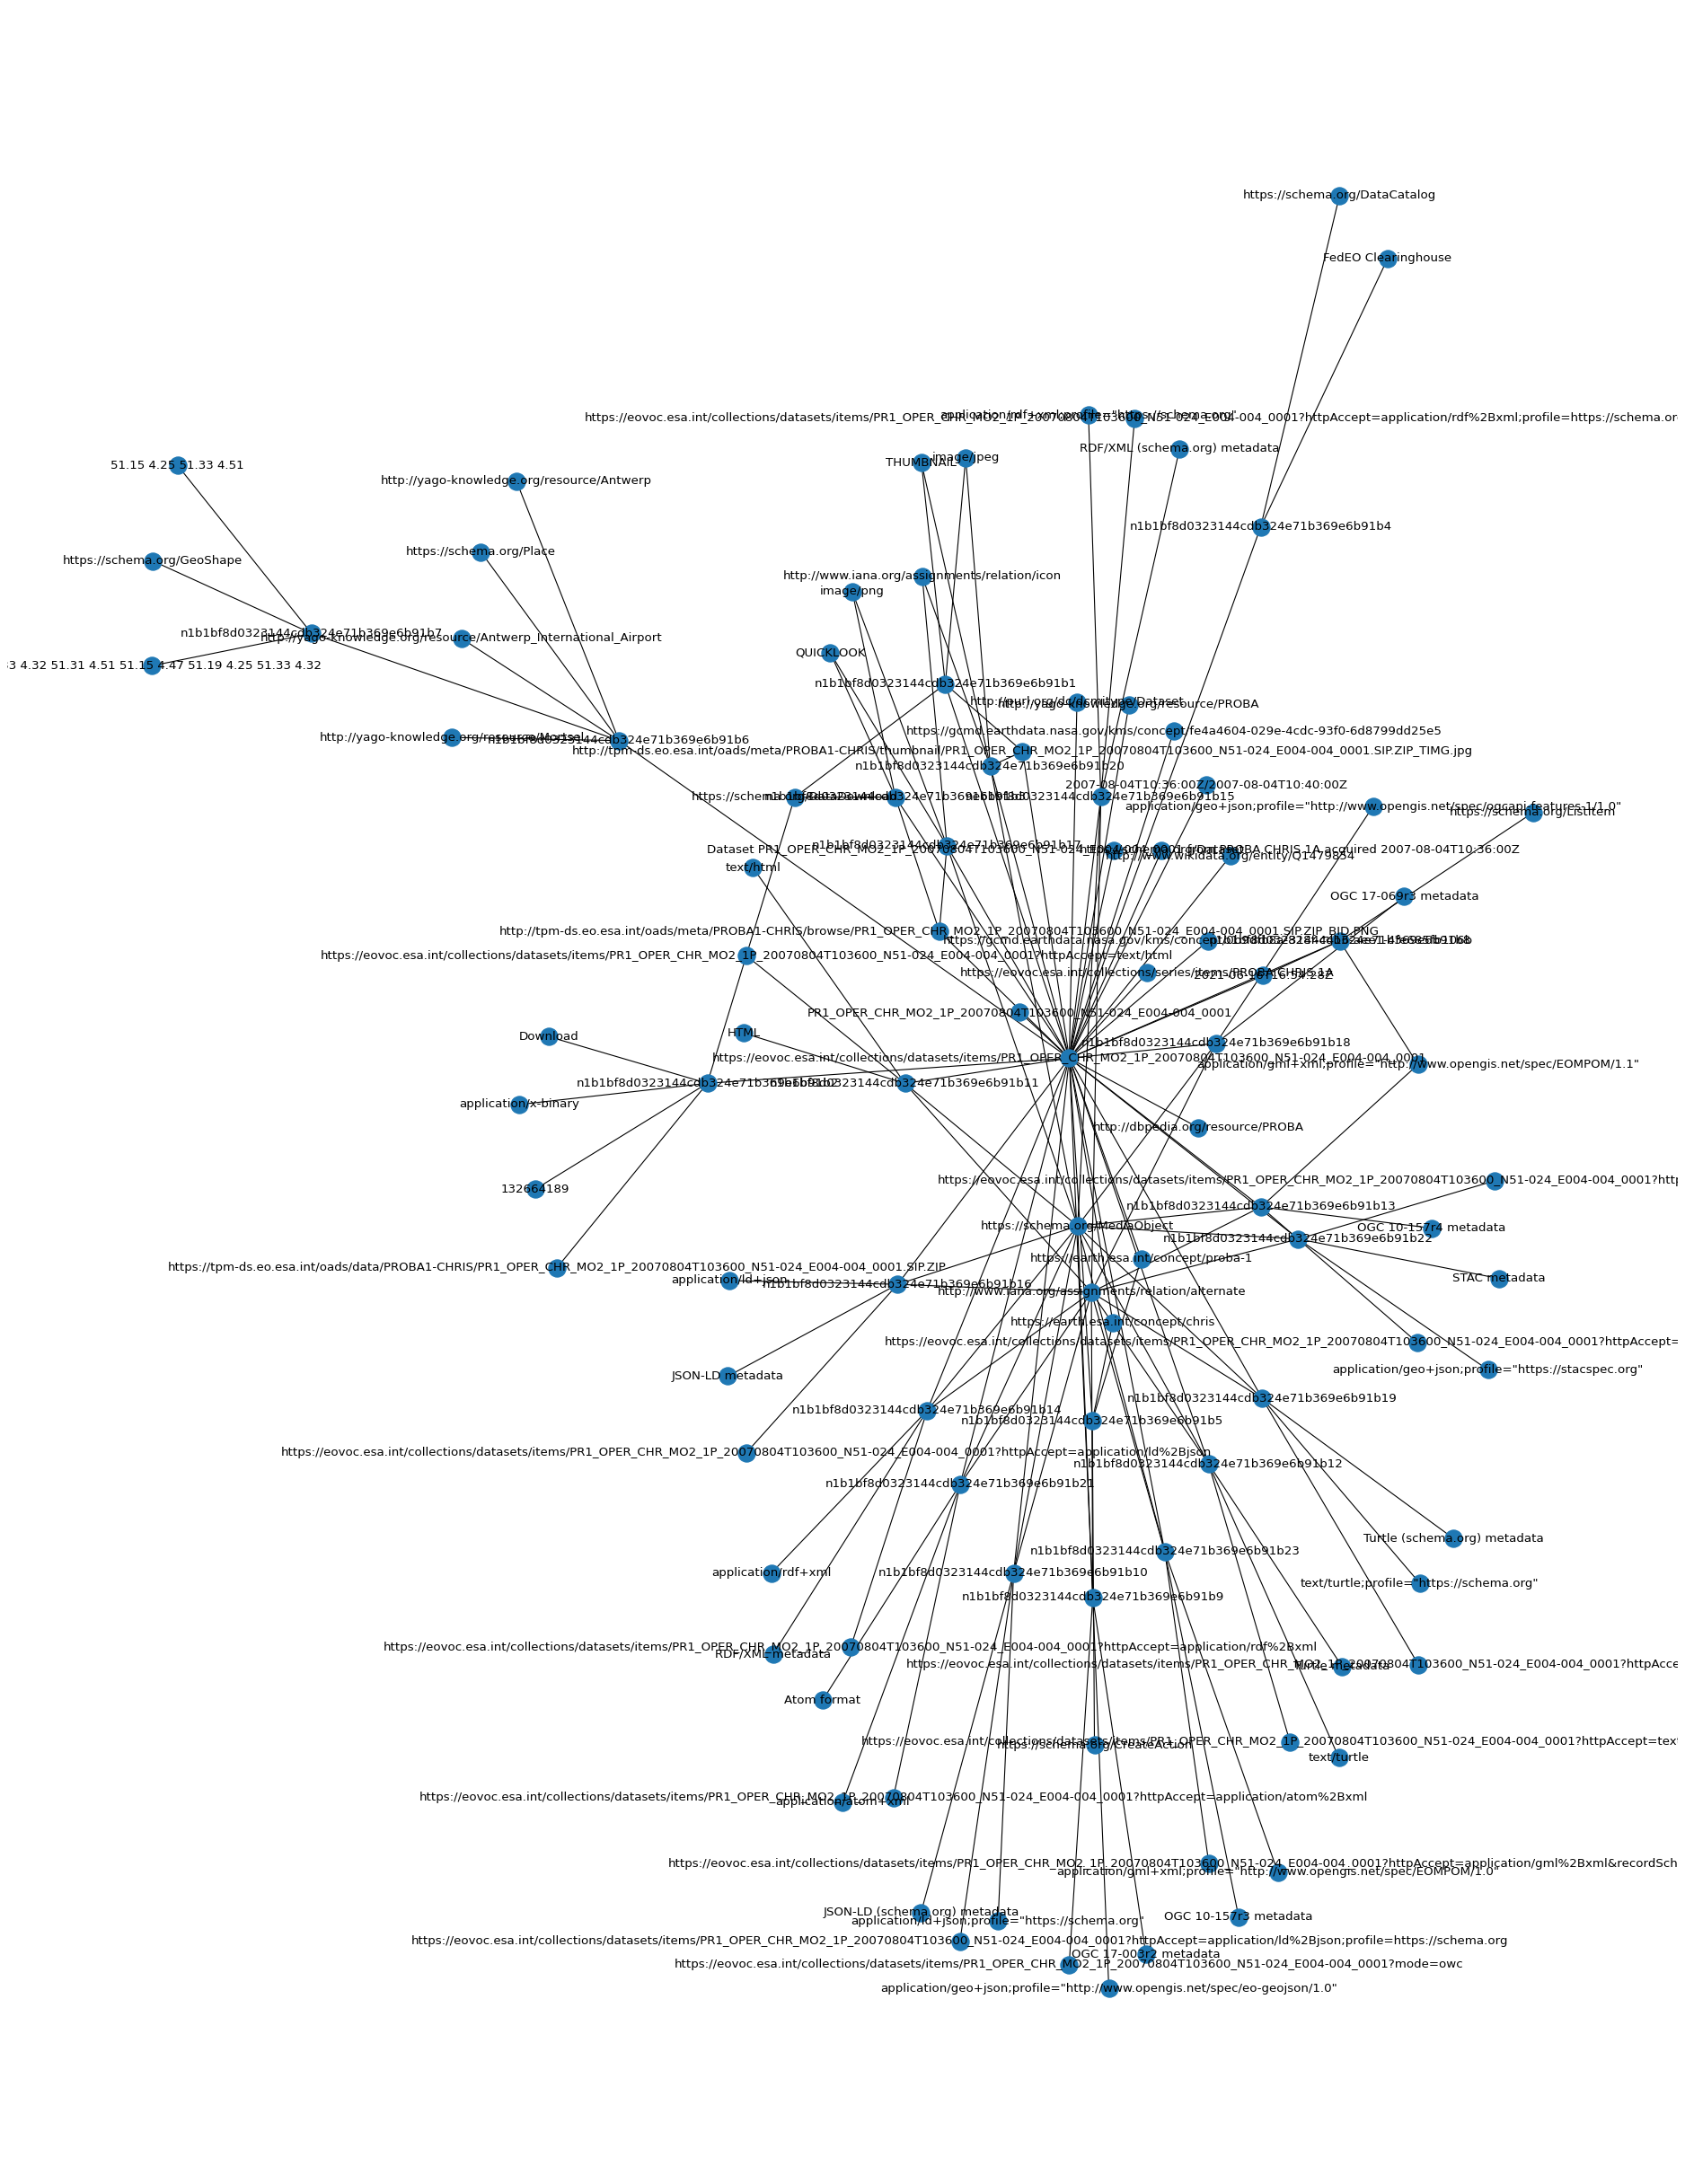

In [35]:
figure(figsize=(30, 40), dpi=80)
rg = rdflib.Graph()
rg.parse(data=response.text, format='ttl', encoding='utf-8')
G = rdflib_to_networkx_graph(rg)
plt.plot()
nx.draw(G, with_labels=True)


**Example: 35**  
>  Describe single Granule metadata record in JSON-LD   
  OK.  


In [36]:
q="""

DESCRIBE <https://eovoc.esa.int/collections/datasets/items/PR1_OPER_CHR_MO2_1P_20070804T103600_N51-024_E004-004_0001>
WHERE
{
}


"""
response = requests.post('http://eovoc.spacebel.be:8080/thesaurus/sparql', data=q , headers={'content-type': 'application/sparql-query', 'Accept': 'application/ld+json'})
print(response.text)


{
  "@graph" : [ {
    "@id" : "_:b0",
    "@type" : "MediaObject",
    "additionalType" : "iana:alternate",
    "contentUrl" : "https://eovoc.esa.int/collections/datasets/items/PR1_OPER_CHR_MO2_1P_20070804T103600_N51-024_E004-004_0001?httpAccept=application/ld%2Bjson",
    "encodingFormat" : "application/ld+json",
    "name" : "JSON-LD metadata"
  }, {
    "@id" : "_:b1",
    "@type" : "Place",
    "geo" : "_:b2",
    "geoContains" : [ "http://yago-knowledge.org/resource/Antwerp_International_Airport", "http://yago-knowledge.org/resource/Antwerp", "http://yago-knowledge.org/resource/Mortsel" ]
  }, {
    "@id" : "_:b10",
    "@type" : "DataDownload",
    "contentUrl" : "http://tpm-ds.eo.esa.int/oads/meta/PROBA1-CHRIS/thumbnail/PR1_OPER_CHR_MO2_1P_20070804T103600_N51-024_E004-004_0001.SIP.ZIP_TIMG.jpg",
    "encodingFormat" : "image/jpeg",
    "name" : "THUMBNAIL"
  }, {
    "@id" : "_:b11",
    "@type" : "DataCatalog",
    "name" : "FedEO Clearinghouse"
  }, {
    "@id" : "_:b12",
   

<a name='SPARQL-DESCRIBE---Collections'></a>     
## SPARQL DESCRIBE - Collections  
**Example: 36**  
>  Describe single collection metadata record in RDF/XML   
  OK.  


In [37]:
q="""

DESCRIBE <https://eovoc.esa.int/collections/series/items/TropForest>

"""
response = requests.post('http://eovoc.spacebel.be:8080/thesaurus/sparql', data=q , headers={'content-type': 'application/sparql-query', 'Accept': 'application/rdf+xml'})
print(response.text)


<rdf:RDF
    xmlns:j.0="https://gcmd.earthdata.nasa.gov/kms/concepts/concept_scheme/"
    xmlns:yago="https://yago-knowledge.org/resource/"
    xmlns:base="https://earth.esa.int/concept/"
    xmlns:skosthes="http://purl.org/iso25964/skos-thes#"
    xmlns:dcterms="http://purl.org/dc/terms/"
    xmlns:dc="http://purl.org/dc/elements/1.1/"
    xmlns:inspire="https://www.eionet.europa.eu/gemet/en/inspire-theme/"
    xmlns:prov="http://www.w3.org/ns/prov#"
    xmlns:sosa="http://www.w3.org/ns/sosa/"
    xmlns:skos="http://www.w3.org/2004/02/skos/core#"
    xmlns:eop="http://www.opengis.net/ont/eo-geojson/1.0/"
    xmlns:sh="http://www.w3.org/ns/shacl#"
    xmlns:owc="http://www.opengis.net/ont/owc/1.0/"
    xmlns:j.1="https://earth.esa.int/concepts/concept_scheme/"
    xmlns:vann="http://purl.org/vocab/vann/"
    xmlns:org="http://www.w3.org/ns/org#"
    xmlns:xsd="http://www.w3.org/2001/XMLSchema#"
    xmlns:dbpedia="https://dbpedia.org/resource/"
    xmlns:rdf="http://www.w3.org/1999/02/2

**Example: 37**  
>  Describe single collection metadata record in Turtle   
  OK.  


In [38]:
q="""

DESCRIBE <https://eovoc.esa.int/collections/series/items/TropForest>

"""
response = requests.post('http://eovoc.spacebel.be:8080/thesaurus/sparql', data=q , headers={'content-type': 'application/sparql-query', 'Accept': 'text/turtle'})
print(response.text)


@prefix schema: <https://schema.org/> .
@prefix :      <https://schema.org/> .
@prefix gcmd:  <https://gcmd.earthdata.nasa.gov/kms/concepts/concept_scheme/> .
@prefix owl:   <http://www.w3.org/2002/07/owl#> .
@prefix earthesa: <https://earth.esa.int/concepts/concept_scheme/> .
@prefix eop:   <http://www.opengis.net/ont/eo-geojson/1.0/> .
@prefix xsd:   <http://www.w3.org/2001/XMLSchema#> .
@prefix skosthes: <http://purl.org/iso25964/skos-thes#> .
@prefix yago:  <https://yago-knowledge.org/resource/> .
@prefix skos:  <http://www.w3.org/2004/02/skos/core#> .
@prefix rdfs:  <http://www.w3.org/2000/01/rdf-schema#> .
@prefix media: <http://search.yahoo.com/mrss/> .
@prefix wd:    <http://www.wikidata.org/entity/> .
@prefix qb:    <http://purl.org/linked-data/cube#> .
@prefix dct:   <http://purl.org/dc/terms/> .
@prefix sh:    <http://www.w3.org/ns/shacl#> .
@prefix rdfa:  <http://www.w3.org/ns/rdfa#> .
@prefix dcterms: <http://purl.org/dc/terms/> .
@prefix dcat:  <http://www.w3.org/ns/dcat#

Display the response as a graph.


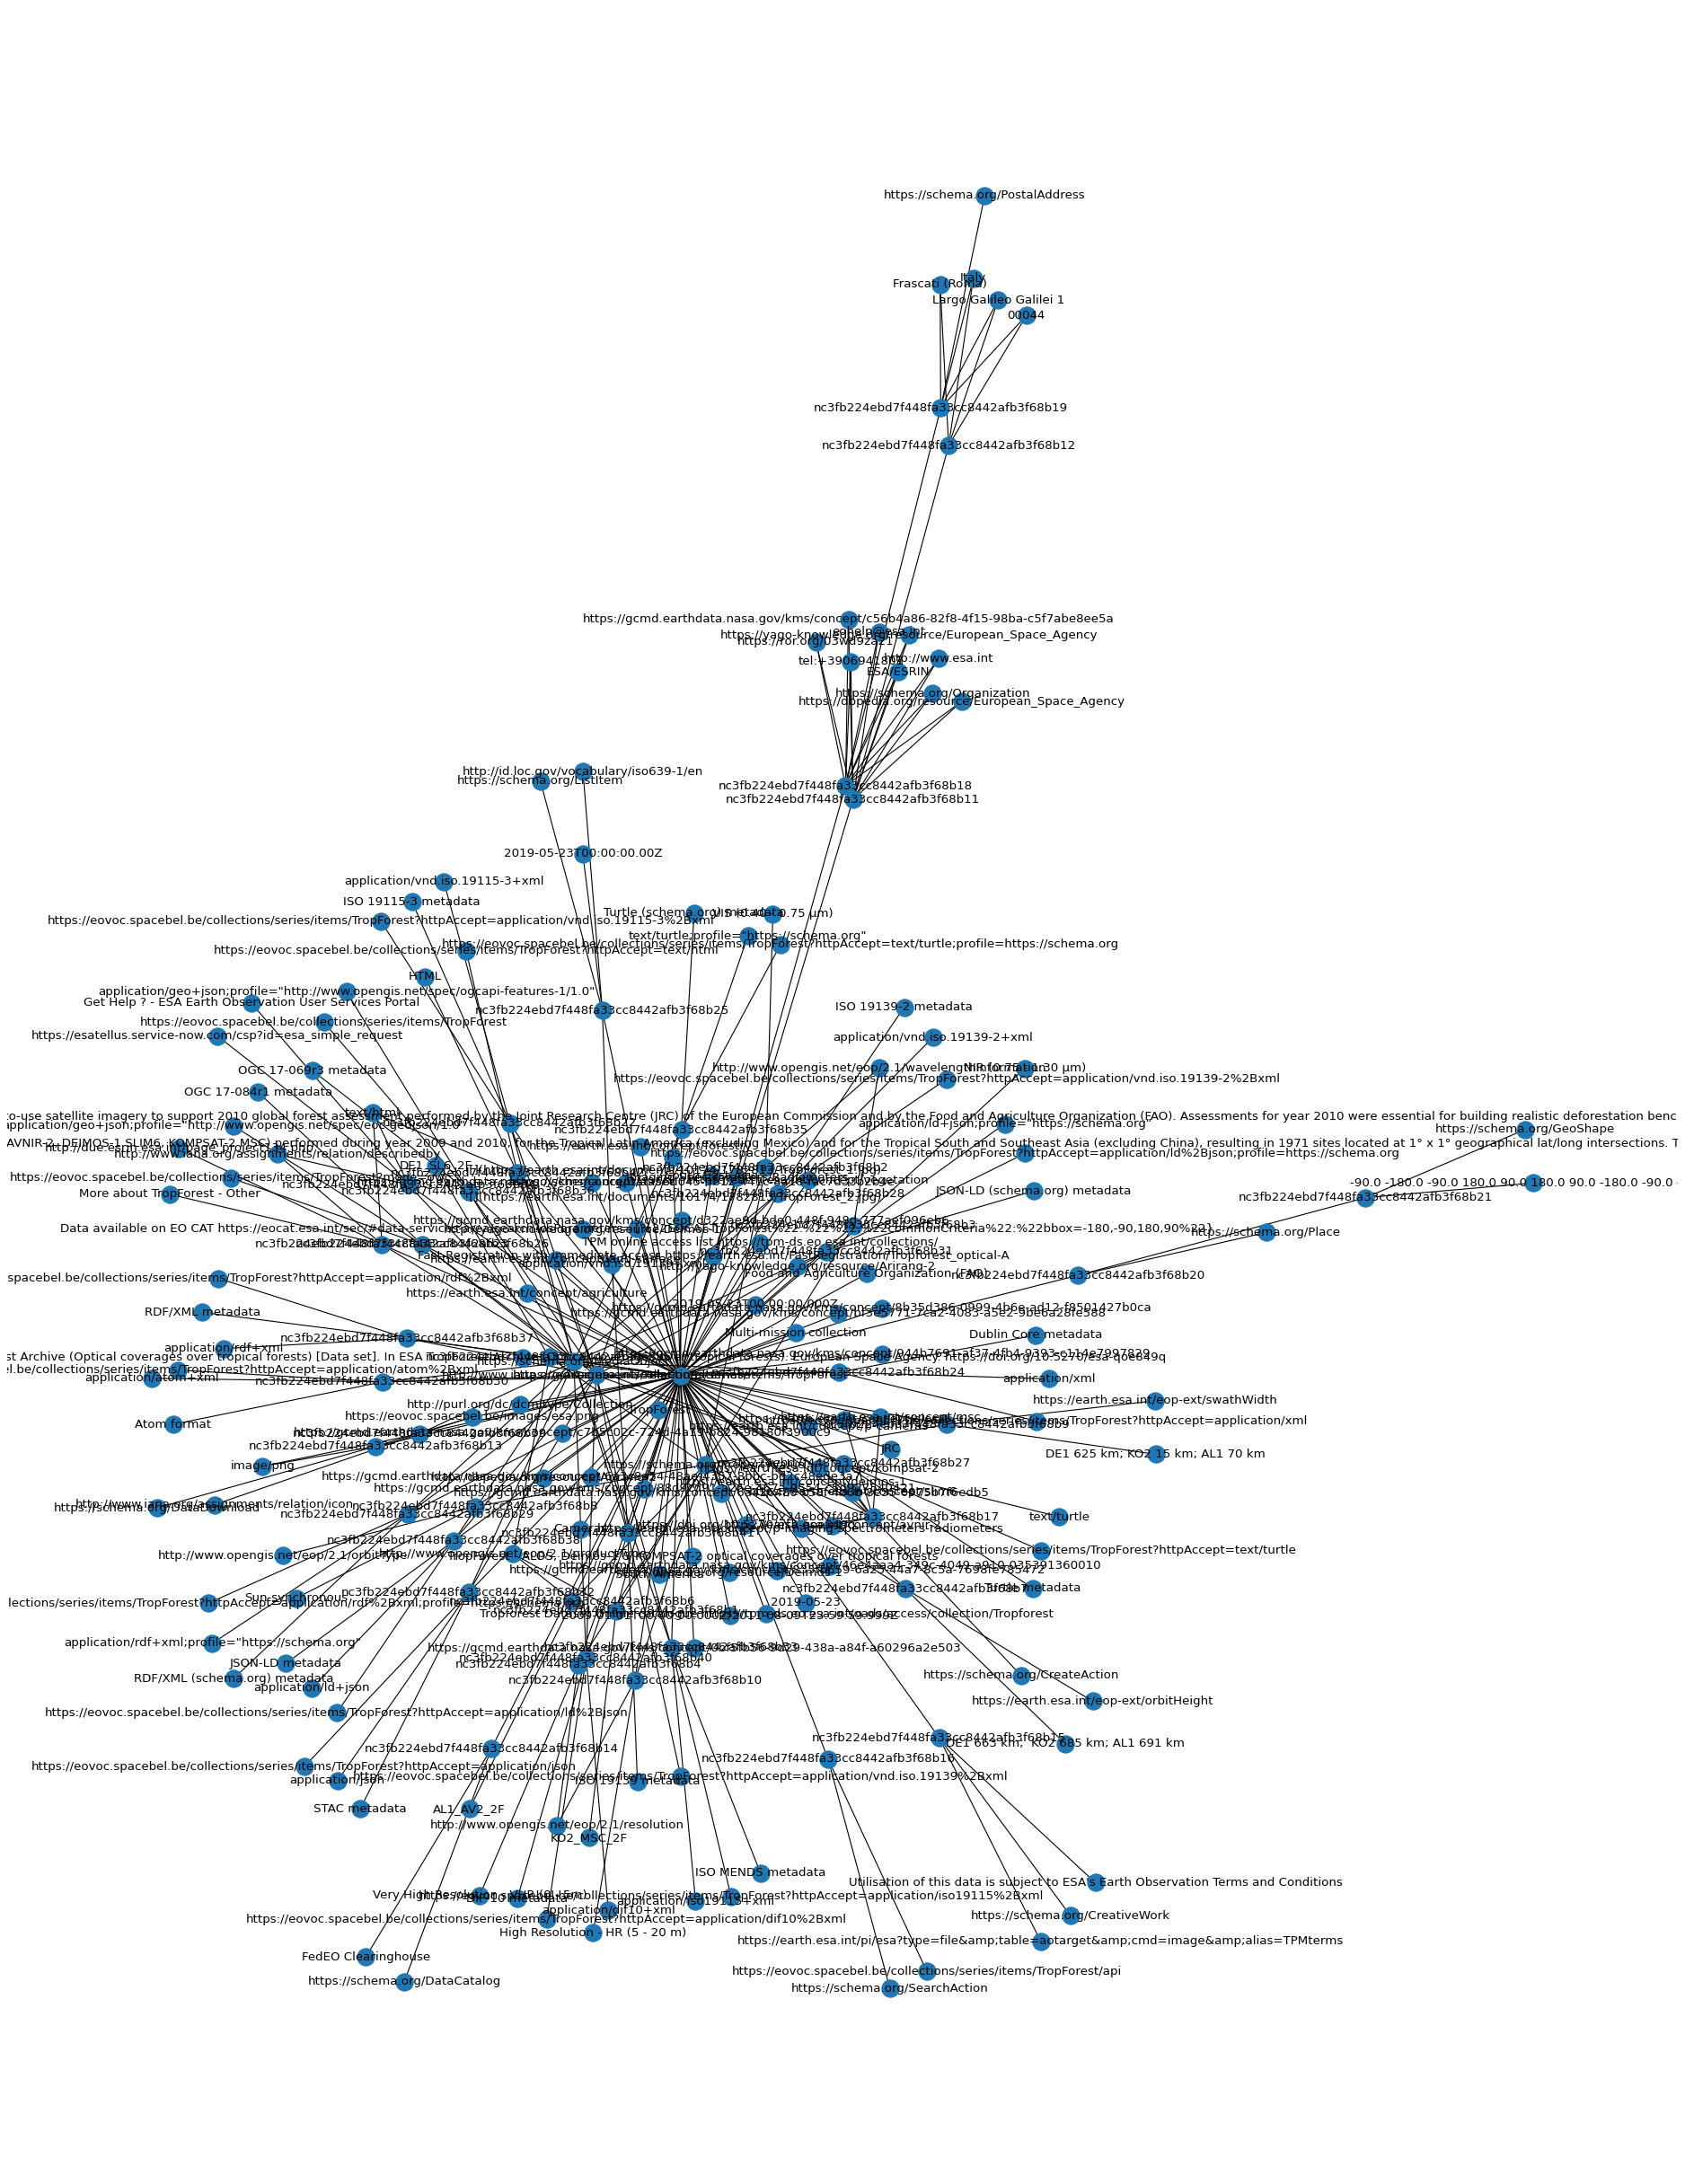

In [39]:
figure(figsize=(30, 40), dpi=80)
rg = rdflib.Graph()
rg.parse(data=response.text, format='ttl', encoding='utf-8')
G = rdflib_to_networkx_graph(rg)
plt.plot()
nx.draw(G, with_labels=True)


**Example: 39**  
>  Describe multiple collection metadata records in RDF/XML   
  OK.  


In [40]:
q="""

PREFIX schema: <https://schema.org/>

DESCRIBE ?c

WHERE
{
  ?c schema:additionalType <http://purl.org/dc/dcmitype/Collection>.
  ?c schema:identifier "TropForest".
}

"""
response = requests.post('http://eovoc.spacebel.be:8080/thesaurus/sparql', data=q , headers={'content-type': 'application/sparql-query', 'Accept': 'application/rdf+xml'})
print(response.text)


<rdf:RDF
    xmlns:j.0="https://gcmd.earthdata.nasa.gov/kms/concepts/concept_scheme/"
    xmlns:yago="https://yago-knowledge.org/resource/"
    xmlns:base="https://earth.esa.int/concept/"
    xmlns:skosthes="http://purl.org/iso25964/skos-thes#"
    xmlns:dcterms="http://purl.org/dc/terms/"
    xmlns:dc="http://purl.org/dc/elements/1.1/"
    xmlns:inspire="https://www.eionet.europa.eu/gemet/en/inspire-theme/"
    xmlns:prov="http://www.w3.org/ns/prov#"
    xmlns:sosa="http://www.w3.org/ns/sosa/"
    xmlns:skos="http://www.w3.org/2004/02/skos/core#"
    xmlns:eop="http://www.opengis.net/ont/eo-geojson/1.0/"
    xmlns:sh="http://www.w3.org/ns/shacl#"
    xmlns:owc="http://www.opengis.net/ont/owc/1.0/"
    xmlns:j.1="https://earth.esa.int/concepts/concept_scheme/"
    xmlns:vann="http://purl.org/vocab/vann/"
    xmlns:org="http://www.w3.org/ns/org#"
    xmlns:xsd="http://www.w3.org/2001/XMLSchema#"
    xmlns:dbpedia="https://dbpedia.org/resource/"
    xmlns:rdf="http://www.w3.org/1999/02/2

**Example: 40**  
>  Describe multiple collection metadata records in RDF/XML   
  OK.  


In [41]:
q="""

DESCRIBE <https://earth.esa.int/concept/proba-1>

WHERE
{

}

"""
response = requests.post('http://eovoc.spacebel.be:8080/thesaurus/sparql', data=q , headers={'content-type': 'application/sparql-query', 'Accept': 'application/rdf+xml'})
print(response.text)


<rdf:RDF
    xmlns:j.0="https://gcmd.earthdata.nasa.gov/kms/concepts/concept_scheme/"
    xmlns:yago="https://yago-knowledge.org/resource/"
    xmlns:base="https://earth.esa.int/concept/"
    xmlns:j.1="http://yago-knowledge.org/resource/"
    xmlns:skosthes="http://purl.org/iso25964/skos-thes#"
    xmlns:dcterms="http://purl.org/dc/terms/"
    xmlns:dc="http://purl.org/dc/elements/1.1/"
    xmlns:inspire="https://www.eionet.europa.eu/gemet/en/inspire-theme/"
    xmlns:prov="http://www.w3.org/ns/prov#"
    xmlns:sosa="http://www.w3.org/ns/sosa/"
    xmlns:skos="http://www.w3.org/2004/02/skos/core#"
    xmlns:eop="http://www.opengis.net/ont/eo-geojson/1.0/"
    xmlns:sh="http://www.w3.org/ns/shacl#"
    xmlns:owc="http://www.opengis.net/ont/owc/1.0/"
    xmlns:j.2="https://earth.esa.int/concepts/concept_scheme/"
    xmlns:vann="http://purl.org/vocab/vann/"
    xmlns:org="http://www.w3.org/ns/org#"
    xmlns:xsd="http://www.w3.org/2001/XMLSchema#"
    xmlns:dbpedia="https://dbpedia.org/r

<a name='SPARQL-DESCRIBE---Services'></a>     
## SPARQL DESCRIBE - Services  
**Example: 41**  
>  Describe single service metadata record in RDF/XML   
  OK.  


In [42]:
q="""

DESCRIBE <https://eovoc.esa.int/collections/services/items/rasdaman>

"""
response = requests.post('http://eovoc.spacebel.be:8080/thesaurus/sparql', data=q , headers={'content-type': 'application/sparql-query', 'Accept': 'application/rdf+xml'})
print(response.text)


<rdf:RDF
    xmlns:j.0="https://gcmd.earthdata.nasa.gov/kms/concepts/concept_scheme/"
    xmlns:yago="https://yago-knowledge.org/resource/"
    xmlns:base="https://earth.esa.int/concept/"
    xmlns:skosthes="http://purl.org/iso25964/skos-thes#"
    xmlns:dcterms="http://purl.org/dc/terms/"
    xmlns:dc="http://purl.org/dc/elements/1.1/"
    xmlns:inspire="https://www.eionet.europa.eu/gemet/en/inspire-theme/"
    xmlns:prov="http://www.w3.org/ns/prov#"
    xmlns:sosa="http://www.w3.org/ns/sosa/"
    xmlns:skos="http://www.w3.org/2004/02/skos/core#"
    xmlns:eop="http://www.opengis.net/ont/eo-geojson/1.0/"
    xmlns:sh="http://www.w3.org/ns/shacl#"
    xmlns:owc="http://www.opengis.net/ont/owc/1.0/"
    xmlns:j.1="https://earth.esa.int/concepts/concept_scheme/"
    xmlns:vann="http://purl.org/vocab/vann/"
    xmlns:org="http://www.w3.org/ns/org#"
    xmlns:xsd="http://www.w3.org/2001/XMLSchema#"
    xmlns:dbpedia="https://dbpedia.org/resource/"
    xmlns:rdf="http://www.w3.org/1999/02/2

**Example: 42**  
>  Describe single service metadata record in Turtle   
  OK.  


In [43]:
q="""

DESCRIBE <https://eovoc.esa.int/collections/services/items/rasdaman>

"""
response = requests.post('http://eovoc.spacebel.be:8080/thesaurus/sparql', data=q , headers={'content-type': 'application/sparql-query', 'Accept': 'text/turtle'})
print(response.text)


@prefix schema: <https://schema.org/> .
@prefix :      <https://schema.org/> .
@prefix gcmd:  <https://gcmd.earthdata.nasa.gov/kms/concepts/concept_scheme/> .
@prefix owl:   <http://www.w3.org/2002/07/owl#> .
@prefix earthesa: <https://earth.esa.int/concepts/concept_scheme/> .
@prefix eop:   <http://www.opengis.net/ont/eo-geojson/1.0/> .
@prefix xsd:   <http://www.w3.org/2001/XMLSchema#> .
@prefix skosthes: <http://purl.org/iso25964/skos-thes#> .
@prefix yago:  <https://yago-knowledge.org/resource/> .
@prefix skos:  <http://www.w3.org/2004/02/skos/core#> .
@prefix rdfs:  <http://www.w3.org/2000/01/rdf-schema#> .
@prefix media: <http://search.yahoo.com/mrss/> .
@prefix wd:    <http://www.wikidata.org/entity/> .
@prefix qb:    <http://purl.org/linked-data/cube#> .
@prefix dct:   <http://purl.org/dc/terms/> .
@prefix sh:    <http://www.w3.org/ns/shacl#> .
@prefix rdfa:  <http://www.w3.org/ns/rdfa#> .
@prefix dcterms: <http://purl.org/dc/terms/> .
@prefix dcat:  <http://www.w3.org/ns/dcat#

Display the response as a graph.


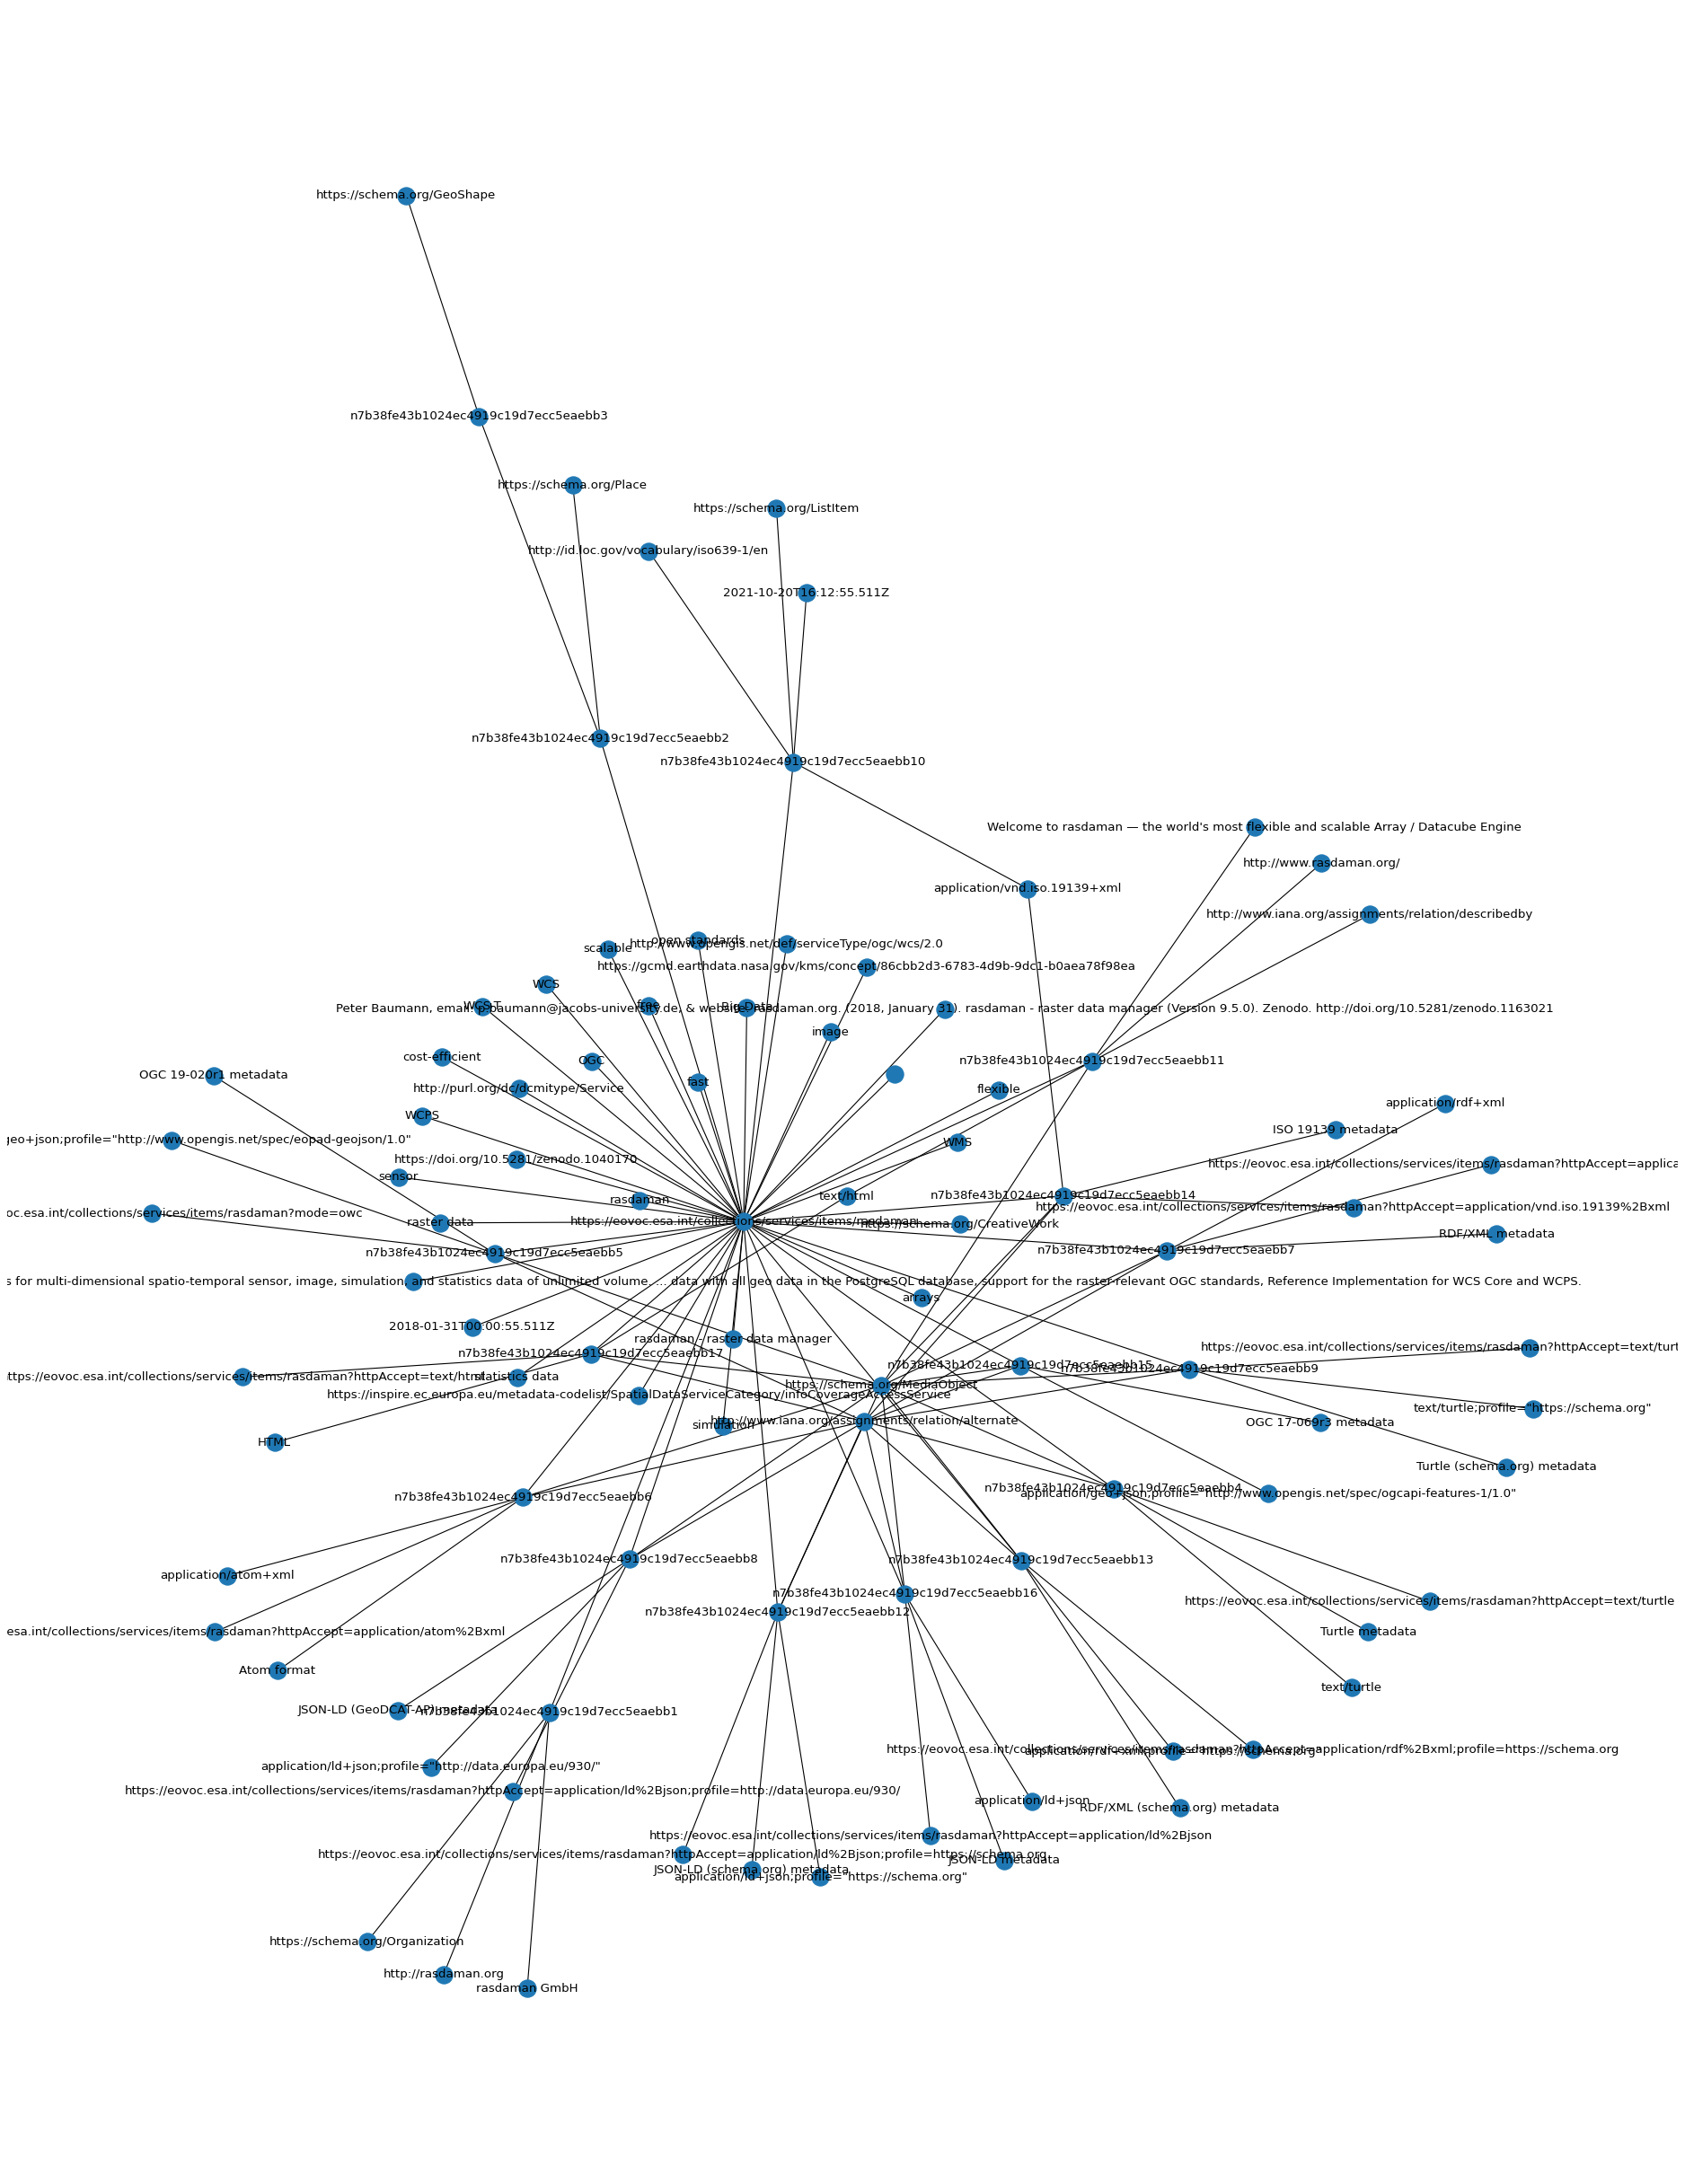

In [44]:
figure(figsize=(30, 40), dpi=80)
rg = rdflib.Graph()
rg.parse(data=response.text, format='ttl', encoding='utf-8')
G = rdflib_to_networkx_graph(rg)
plt.plot()
nx.draw(G, with_labels=True)
